The main purpose of this notebook is to keep a repository of the topics I've learned in my Numerical Solutions of Ordinary and Partial Differential Equations course (**MA20102**, IIT Kharagpur). I have also plotted some solved examples for a better visual understanding of the solutions. The examples are taken from various sources- lectures, the course textbook-*Numerical Methods for Scientific and Engineering Computation by R.K. Jain and S.R.K. Iyengar (7th ed.)* etc.

The code here was written by me after referring to the formulae in the textbook, if you have any questions/suggestions/comments, feel free to ask me at: maitreyiswaroop@gmail.com

- Maitreyi Swaroop

In [ ]:
import math
from math import *
fact = math.factorial
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
def nCr(n,r): return fact(n)/fact(r)/fact(n-r)

# Numerical Methods to solve ODEs

**Existence and Uniqueness of solution for an ODE** 

For the differential equation $\dfrac{\mathrm{d}y}{\mathrm{d}x} = f(x,y)$ subject to -
> 1. $f$ is a continuous function of x and y in some domain $D \in \mathbb{R^2}$
> 2. The partial derivative $\frac{\partial f}{\partial y}$ is also a continuous function of x and y in $D$

> Let $(x_o,y_o)$ be a point in $D$, then $\exists$ a unique solution $\phi$ of the differential equation on some interval $|x - x_o|\leq h$ (for a sufficiently small h), that satisfies the condition $\phi(x_o) = y_o$

**Existence and Uniqueness for solution for an IVP** 

Given the IVP $\dfrac{\mathrm{d}y}{\mathrm{d}x} = f(x,y)$, $y(x_o) = y_o$. 
For - 
> 1. $f(x,y)$ is a real valued function.
> 2. $f(x,y)$ is defined and continuous in the strip $[x_o,b], y\in (-\infty, \infty)$
> 3. If there exists a constant $L$ such that for any $x \in [x_o, b] \text{and for } y_1,y_2 \\ \boxed{|f(x_1,y_1)-f(x_2,y_2)| \leq L|y_1 - y_2|}$ 

> then $\exists!$ a unique solution for the IVP. $L$ is called the $\text{Lipschitz Constant}$.


**Types of Methods**
1. Based on number of values required:
Single-Step Methods and Multi-Step Methods

Single Step | Multi-Step
---|---
- Solution at any point $x_{j+1}$ is obtained <br>using the solution only at a previous point $x_{j}$. | - 
- In general it is written as $y_{j+1} = y_j + h\phi(x_{j},y_{j},h)$-(1)|

Here $\phi$ is the *increment function*, with parameters $x_j,x_{j+1}, y_j,y_{j+1},h$ and which also depends on $f$.

2. Implicit Methods and Explicit Methods

Implicit | Explicit
---|---
If the method involves the value of the unknown $y_{j+1}$ on both sides, it is IMPLICIT. |If $y_{j+1}$ can simply be determined using the RHS of the given equation <br>$y_{j+1} = y_j +h\phi(x_j,y_j,h)$, the method is EXPLICIT.

___

For an interval $[a,b], s.t. x \in [a,b]$, mesh/grid points are all the evenly spaced points in this interval, determined by the step length/size $h$. 

Exact solution at $x_j = y(x_j)$<br>
Numerical solution at $x_j = y_j$

**Order of a method: $O(h^\alpha)$:**

>Order of a method is the largest integer $p$ for which 
$\boxed{|\frac{1}{h}T_{j+1}| = O(h^{p})}$ where $T_{j+1}$ is the truncation/discretisation error.
> Changing the mesh size/ distance between the grid points $x_{j}, x_{j+1}$ by a scale of $1/k$ reduces mesh size from $h$ to $h/k$ , which reduces the error by a factor of $1/k^p$

Hence order is a measure of accuracy, it tells us how rapidly the accuracy can be improved with refinement of the grid spacing h. 

O(h) means the first term neglected is of order $h$.
> The order of a difference equation is the number of intervals separating the largest and smallest arguments of the dependent variable (this will make more sense when you see the Euler single step methods).

**Stability**

> A method is stable if the cumulative effect of all errors, including round-off errors is bounded, independent of the number of mesh points.

___

**Errors** 

1. Local Truncation Error (LTE):
$T_{j+1} = y(x_{j+1}) - y(x_j)-h\phi(x_j,y(x_j),h)$
> It is the difference between the exact solution $y(x_{j+1})$ and the numerical solution $y_{j+1}$ with exact arithmetic.

2. If solution by numerical method is u, u* is numerical solution, percentage error = $\frac{|u-u^*|}{|u|}\times 100$

<!-- 3. Round-off error is the amount by which a particular method does *not* satisfy the numerical solution (say, $\bar{y}_j$) -->
___

# **Initial Value Problems**

**Behaviour of the Solutions of an IVP**

> The behaviour of the solution of an IVP $\\y' = f(x,y); y(x_o) = y_o ...(1)$ <br>in the neighbourhood of any point $(\bar{x},\bar{y})$ can be obtained by considering the linearised form of the differential equation called the *test equation*.
>> **Test equation**: <br> 
The non-linear function $f(x,y)$ can be linearised using the Taylor Series expansion of $f$ about the point $(\bar{x},\bar{y})$-
$f(x,y) = f(\bar{x},\bar{y}) + (x-\bar{x})\frac{\partial f(\bar{x},\bar{y})}{\partial x}+ (y-\bar{y})\frac{\partial f(\bar{x},\bar{y})}{\partial y}+(\text{higher order terms})...(2)$ 
<br> (2) can be rewritten as $y' = {\lambda}y + c ...(3)$, <br>where ${\lambda} = \frac{\partial f(\bar{x},\bar{y})}{\partial y} \text{ and } c = f(\bar{x},\bar{y}) -\bar{y}\frac{\partial f(\bar{x},\bar{y})}{\partial y} + (x-\bar{x})\frac{\partial f(\bar{x},\bar{y})}{\partial x}$
<br><br>
Now we substitute $w = y +c/\lambda \text{ in (3)}, $ which gives us $y' = w' = {\lambda}[w-(c/{\lambda})]+c = \lambda w$
<br> The resulting test equation is $\boxed{w' = {\lambda}w \implies w(x) = ke^{\lambda x}}$ where k is an arbitrary constant.

This is the test equation for the non-linear, first-order initial value problem (1).

---

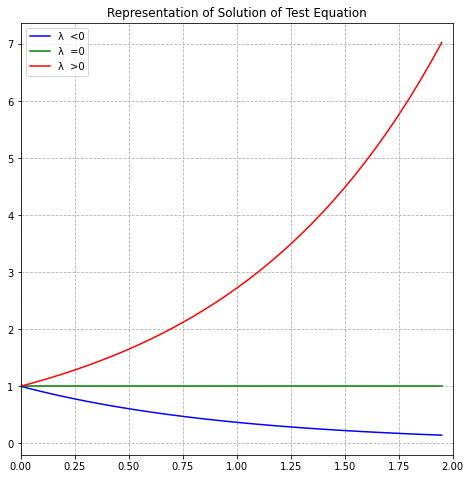

In [ ]:
#@title
#Plotting Solution:
fig1 = plt.figure(figsize=[6,6])
a1 = fig1.add_axes([0,0,1,1])
plt.grid(linestyle = 'dashed')
plt.title("Representation of Solution of Test Equation")
plt.xlim([0,2])
cols = ['b', 'g', 'r']
signs = ['<', '=', '>']
for lamda in [-1,0,1]:
  x = 0
  X = []
  Y = []
  while x <= 2:
    X.append(x)
    Y.append(exp(lamda*x))
    x+=0.05
  a1.plot(X,Y,color = cols[lamda+1], linestyle = '-', label = 'λ  '+signs[lamda+1]+str(0))
leg = a1.legend();

## Reduction of Higher Order Equations to a System of First Order Differential Equations

The $m^{th}$ order differential equation<br> 
>$y^{(m)} = F(x,y,y',...,y^{(m-1)})$ 

with initial conditions<br> 
>$y^{(\nu)}(x_0)=\eta_{\nu}, \nu = 0,1,2,...,m-1$

Can be reduced to a system of equations $\mathbf{u'} = \mathbf{f}(x,\mathbf{u})\\\mathbf{u}(x_0) = \mathbf{\eta}_0$\
Where $u_1 = y\\u_1' = u_2 = y''\\...\\u'_{m-1} = u_m\\u_m' = F(x,u_1,...,u_m)\\\text{and }\mathbf{u} = [u_1,u_2,...,u_m]^T,\mathbf{f} = [u_2,u_3,...,F]^T,\mathbf{\eta} = [\eta_0,\eta_1,...,\eta_{m-1}]^T$

___
## 1. <ins>Picard's Method of Successive Approximations</ins>

Given $y' = f(x,y); y(x_o) = y_o, x\in[x_o, b]$ and f is continuous,

by Picard's method:

$\boxed{y_{(n)}(x) = y_o + \int_{x_0}^x f(t, y_{(n-1)}(t))dt_{n = 1,2,...}}$

Here we start with $y_{(0)}$ as a constant function which satisfies $y(x_o) = y_o$, ie we take $y_{(0)} = y_0.$

We iteratively generate $y_{(i+1)}$ from ${y_{(i)}}$ and get increasingly closer approximations for the exact solution of the IVP.

$y_{(n)}(x) \to y(x) \text{ as } n\to \infty$

> Picard's method is considered to be a 'semi-analytical' method.<br>
> Derivation (in brief):<br>
$\frac{dy}{dx} = f(x,y);y(x_0) = y_0\\
\Rightarrow\int_{x_0}^{x}\frac{dy}{dx}dx = \int_{x_0}^{x}f(x,y)dx\\
\Rightarrow y(x)-y(x_0) = \int_{x_0}^{x}f(x,y)dx\\
\Rightarrow y(x) = y(x_0) +\int_{x_0}^{x}f(x,y)dx$<br>
>>This was the analytical part. As you can see, the RHS requires us to know $y$. Here we bring in the iterative, numerical part, we take an initial guess value of $y, y_{(0)}$ which is usually taken as $y(x_0)$.

---

### Picard's Mathematica code
```
(*Picard's Method*)
{x0,y0,xmax} = {0,1,4};

f[x_,y_]:=  x^2 + y^2 (*Enter the function here*)
(* x^2 + y^2 is taken for this example *) 
For[{n = 1, y[0][x_] = y0}, 
  n < xmax, n++, 
  y[n][x_] = y0 + Integrate[f[t,y[n-1][t]], {t, x0, x}]; 
Print[{n, y[n][t]}]] 
```

### Questions on Picard's Method

Q1. $y' = x^2 +y^2; y(0) = 1$

A. Here we take $\phi_o(x) = y_o = 1$

> n = 1
>>$\phi_1(x) = 1 + \int_{0}^x(t^2 + 1)dt = 1+ \frac{x^3}{3} + x$

> n = 2
>>$\phi_2(x) = 1 + \int_{0}^x(t^2 + (1+ \frac{t^3}{3} + t)^2)dt 
\\= 1+ \int_{0}^x(1+ 2t+ 2t^2+2\frac{t^3}{3}+ 2\frac{t^4}{3} + \frac{t^6}{9})dt 
 \\ =1+ x+ x^2+2\frac{x^3}{3}+\frac{x^4}{6}+ 2\frac{x^5}{15} + \frac{x^7}{63}  $

...

(this method is very easy to code on mathematica, I'll attach the mathematica code at the end of this notebook).

---


Q2. $y' = sin(x) +y^2; y(0) = 0$

A. We take $\phi_o(x) = y_o = 0$

> n = 1
>>$\phi_1(x) = 0 + \int_{0}^x(sin(t) + 0)dt = 1 - cos(x)$

> n = 2
>>$\phi_2(x) = 0 + \int_{0}^x(sin(t) + (1 - cos(t))^2)dt \\= \int_{0}^x(sin(t) + 1 - 2cos(t) + \frac{cos(2t)+1}{2})dt \\= [-cos(t) + t - 2sin(t) + \frac{sin(2t)}{4} +\frac{t}{2}]_{0}^{x}\\ = -cos(x) + x - 2sin(x) +\frac{sin(2x)}{4} + \frac{x}{2} +1$
...

---

##2. <ins>Taylor Series Method / Power Series Method</ins>

- This method is an **explicit**, **single-step** method.

We assume we can expand y(x) in Taylor Series about any point $x_j, \text{for } x\in[x_o,b]$:

Then, 
> $y(x) = y(x_j) + (x-x_j)y'(x_{j})+ \frac{(x-x_j)^2}{2!}y''(x_{j})+...+ \frac{(x-x_j)^p}{p!}y^{(p)}(x_{j}) + \frac{(x-x_j)^{p+1}}{(p+1)!}y^{(p+1)}(x_{j} + \theta h); \hspace{10mm}\theta \in(0,1)$

Substituting $x = x_{j+1}$ we get:
> $y_{j+1} = y_j + hy_{j}'+ \frac{h^2}{2!}y_{j}''+...+ \frac{h^p}{p!}y_{j}^{(p)}+ \frac{h^{p+1}}{(p+1)!}y^{(p+1)}(x_{j} + \theta h) \\
\hspace{9mm}= y_j + h\phi(x_j, y_j,h)+ \frac{h^{p+1}}{(p+1)!}y^{(p+1)}(x_{j} + \theta h)$

If we define -
> $h\phi(x_j,y(x_j), h) = hy_{j}'+ \frac{h^2}{2!}y_{j}''+...+ \frac{h^p}{p!}y_{j}^{(p)} $

Neglecting the error term we have: 

**Taylor Series Method of Order $p$**

$\boxed{y_{j+1} = y_j + h\phi(x_j, y_j, h)= y_j + hy_{j}'+ \frac{h^2}{2!}y_{j}''+...+ \frac{h^p}{p!}y_{j}^{(p)}};\hspace{3mm}j = 0,1,...,N-1$

>The truncation error for this method is given by $\boxed{T_{j+1} = \frac{h^{p+1}}{(p+1)!}y_{j}^{(p+1)}(x_j +\theta h)}$ (Indicated by $R_{p+1}$ in Prof's notes.)

Where $h = x_{j+1} - x_j$, ie the step size.

<!-- If we define -
> $h\phi(x_j,y(x_j), h) = hy_{j}'+ \frac{h^2}{2!}y_{j}''+...+ \frac{h^p}{p!}y_{j}^{(p)} + \frac{h^{p+1}}{(p+1)!}y_{j}^{(p+1)}(x_j +\theta h)$

Then the above can be written as $y_{j+1} = y_j + h\phi_j; j = 0,1,2,...,N-1$ -->

> $y'(x_0) = f(x_0, y_0) \\ y''(x_o) = \frac{\partial f}{\partial x} + \frac{\partial f}{\partial y}\frac{dy}{dx} =f_x + ff_y 
\\y'''(x_o) = \frac{\partial}{\partial x}(\frac{\partial f}{\partial x} + \frac{\partial f}{\partial y}\frac{dy}{dx})+\frac{\partial}{\partial y}(\frac{\partial f}{\partial x} + \frac{\partial f}{\partial y}\frac{dy}{dx})\frac{dy}{dx} \\ \hspace{12mm} = f_{xx} + 2ff_{xy}+f^2f_{yy} +f+y(f_{x}+ ff_y)$

__Note__
1. If $x_j$ and $y_j$ are known exactly, then $y(x_{j+1})$ can be computed explicitly.

2. The *truncation* error in approximation is $\boxed{T_{j+1} = \frac{h^{p+1}}{(p+1)!}y_{}^{(p+1)}(x_j +\theta h)}$ (Indicated by $R_{p+1}$ in Prof's notes, $R$ for remainder term).

3. The no. of terms to be included in the exapnsion is fixed by the permissable error at any location $x_j$. 

4. If $\epsilon$ is the given error and the series is truncated at the term $y^p(x_j), then \boxed{h^{p+1}|y^{(p+1)}(x_j + \theta h)| < (p+1)!\epsilon} or \boxed{h^{p+1}|f^{(p)}(x_j + \theta h)| < (p+1)!\epsilon}$

> - Since $(x_j + \theta h)$ is not known, $|f^{(p)}(x_j + \theta h)|$ in the above is replaced by its maximum value in $[x_o, x_N]$ 
>_OR_
> We write one more non-vanishing term in the series than is required and then differentiate the series p times. The maximum value of this quantity in $[x_o,x_N] $ gives a rough approximation for $|f^{p}(x_j + \theta h)|$.

Here the higher order derivatives are to be calculated from the IVP ($y' = f(x,y)$). Assuming $f(x,y)$ is differentiable as many times as we require. 

This calculation can get a bit tedious. In my python code, we are required to calculate the derivatives on our own and pass these functions into the ```Taylor``` function. Mathematica has the ```Dt[function, variable]``` procedure which makes things easier for us. 

In [ ]:
# @title Taylor Code
def Taylor(steps, order, flist, x_0, y_0, h, x_max):
  print("Taylor Series Approximation of Order ",order)
  if len(flist)!= order:  
    print("Enter the function list with sufficient number of derivatives.")
    return
  y = y_0
  x = x_0
  for i in range(steps):
    y_curr = y
    for k in range(len(flist)):
      print((h**(k+1))*flist[k](x,y_curr)/fact(k+1))
      y += (h**(k+1))*flist[k](x,y_curr)/fact(k+1)
    x += h
    print(i,": y(",x,") = ",y)
  print("------------------------")
  return y

Mathematica Code
```
y'[x_] = 2 x + 3 y[x];
f[x_,y[x_]]=2 x + 3 y[x];
var = {x,y[x]};
{x0,xmax,h,order}={ 0.,0.4,0.1,2};
{y[x0], steps} = {1.,IntegerPart[( xmax-x0)/h]};
X = Range[x0,xmax,h];
Y = ConstantArray[0,steps+1];
Y[[1]] = y[x0];

fs = {f[x,y[x]]};
Do[AppendTo[fs,Dt[f[x,y[x]],{x,i}]],{i,1,order-1}]

Do[
  Y[[j+1]] = Y[[j]];
  Do[Y[[j+1]]+= h^(i)/Factorial[i] (fs[[i]]/.{x-> X[[j]]}),{i,1,order}];
  Print[j,". y[",X[[j+1]],"]= ",Y[[j+1]]];
  y[X[[j+1]]] = Y[[j+1]],{j ,1,steps}
];
```

### Questions on Taylor Series

Q1. Using the Taylor Series method obtain the series solution of $y' = x^2 + y^2; y(0) = 1$

A. Given $y(0) = f(0,1)=1$
> $y'(0) = 0 +1 = 1 \\ y''(0) = \frac{\partial f}{\partial x} + \frac{\partial f}{\partial y}\frac{dy}{dx} =f_x + ff_y = 2x + 2yy' = 0+2 = 2 \\y'''(0) = \frac{d}{dx}(2x + 2yy') = 2 + 2((y')^2 + yy'') = 2 + 2(1 + 2) = 8$

So $y(x) = 1 + (x-0)y'(0) + (x-0)^2y''(0)\frac{1}{2!}+(x-0)^3y'''(0)\frac{1}{3!}+...\\\hspace{10mm} = 1 + x + x^2 + \frac{8}{3!}x^3 + ...$

___

Q2. Given $y' = 2x+3y; y(0) = 1$, $y_{exact} = 11(e^{3x} - 2(3x+1))/9$

(a) Find $x$ if $p=3 $ & $\epsilon = 5\times 10^{-5}$

Here since $x_0=0$ our h = x
Taylor series expansion is $y(x) = 1 + 3x + 3x^2 + \frac{11}{2}x^3\hspace{10mm} [+\frac{99}{4!}x^4]  $

$R_4 = |\frac{x^{3+1}}{(3+1)!}y^{(4)}(\xi)|\leq \epsilon \\\implies |\frac{x^{4}}{(4)!}99e^{3x}(\xi)|\leq 5\times 10^{-5}\\\implies
|x^{4}e^{3x}|\leq 0.000012121212$


In [ ]:
x = 0.0555
x**4*exp(3*x)

1.1206808832348675e-05

So the answer is $x < 0.0555$.

> **Note**: If the exact solution is not known the approximate solution can be found by including one more term from the T.S. approximation.

(b) Find p if $\epsilon = 5\times 10^{-6}, \forall x\in [0,0.4]$.

$R_{p+1}  = |\frac{x^{p+1}}{(p+1)!}y^{(p+1)}(\xi)|\leq \epsilon \\\implies |\frac{(0.4)^{p+1}}{(p+1)!}\frac{11}{9}e^{3\times 0.4}(3^{p+1})|\leq 5\times 10^{-6}\\\implies
\frac{1.2^{p+1}}{(p+1)!} \leq 0.00000123215814$


In [ ]:
k=1
p =0
while k > 0.00000123215814:
  p +=1
  k = 1.2**(p+1)/fact(p+1)
  print(p,k)

1 0.72
2 0.288
3 0.08639999999999999
4 0.020735999999999994
5 0.004147199999999999
6 0.0007109485714285712
7 0.00010664228571428567
8 1.4218971428571425e-05
9 1.7062765714285706e-06
10 1.8613926233766227e-07


Ans. $p \geq 10$

(c) If p = 2, find y(0.4) with h = 0.1
 

In [ ]:
f = lambda x,y: 2*x +3*y
f_ = lambda x,y: 2 + 3*(2*x +3*y)
flist = [f,f_]
order = 2
steps = 4
x_0, x_max = 0,0.4
h = 0.1
y_0 = 1
Taylor(steps, order, flist, x_0, y_0, h, x_max)

Taylor Series Approximation of Order  2
0.30000000000000004
0.05500000000000001
0 : y( 0.1 ) =  1.355
0.4265
0.073975
1 : y( 0.2 ) =  1.8554749999999998
0.5966425
0.099496375
2 : y( 0.30000000000000004 ) =  2.551613875
0.8254841625000001
0.13382262437500003
3 : y( 0.4 ) =  3.510920661875
------------------------


3.510920661875

___
Q3. Find the 3 term Taylor Series sol.ution for the 3rd order IVP: $y''' +yy'' = 0; y(0) = 0, y'(0) = 0, y''(0) = 1; x\in[0,0.2]$

A. $y''' = -yy"\\
\implies y'''(0) = -yy" = 0\\
y^{iv}(0) = -y'y"-yy''' = 0\\
y^{v}(0) = -[yy^{iv}+2y'y"-y"^2] = -1\\
y^{vi}(0) = 0\\
y^{vii}(0) = 0\\
y^{viii}(0) = 11\\
y^{ix}(0) = y^{x}(0) = 0\\
y^{xi}(0) = -375$

Three term TS soln is 
$y(x) = \frac{x^2}{2!}-\frac{x^5}{5!}+\frac{11}{8!}$

(Last question in lecture note 3).

___
Q4. Use 3rd order Taylor series method to find approximate values of y(1.1) and y(1.2) correct upto 3 decimal places given that$\dfrac{dy}{dx} = xy^{1/3}, y(1) = 1, h= 0.1$

In [ ]:
f = lambda x,y: x*(y**(1/3))
f_ = lambda x,y: y**(1/3) +x*1/3*(y**(-2/3))*x*(y**(1/3))
f__ = lambda x,y: 1/3*(y**(-2/3)) +1/3*(2*x*y**(-1/3)-2/3*x**2*y**(-4/3)*x*(y**(1/3)))
flist = [f,f_,f__]
order = 3
steps = 2
x_0, x_max = 1,1.2
h = 0.1
y_0 = 1
Taylor(order, flist, x_0, y_0, h, x_max)

Taylor Series Approximation of Order  3
0.1
0.006666666666666668
0.00012962962962962966
0 : y( 1.1 ) =  1.1067962962962963
0.11378418877469501
0.0071216057586430724
0.00012553949096734906
1 : y( 1.2000000000000002 ) =  1.227827630320602
------------------------


1.227827630320602

<!-- Q4. Given the IVP $u' = t^2 + u^2; u(0) = 0$
... Pg. 436

Determine the first 3 non-zero terms in the TS explansion for u(t) and hence obtain the value for u(1). Also determine t when the error in u(t) is obtained from the first 2 non-zero terms is to be < $10^{-6}$

A. Same ODE as Q1. with different IV. 

>$\begin{array}{|_c_|_c_|_c_|}\hline
i&u^{(i)}(t)&u^{(i)}(0)\\\hline
0&0&\text{Given}\\\hline
1&0&\text{Given}\\\hline
2&1&\text{Given}\\\hline
3&-yy''&0\\\hline
4&-(y'y''+yy''')&0\\\hline
5&-((y'')^2 +2y'y'''+yy^{(4)})&-1\\\hline
6&&0\\\hline
7&&0\\\hline
8&&11\\\hline
9&&0\\\hline
10&&0\\\hline
11&&-375\\\hline
\end{array}$ -->

##3. <ins>Forward Euler Method</ins>: $y_{j+1} = y_{j} + hf_j$

Forward Euler Method (FEM) is a **single step**, **first order**, **explicit method**.

Essentially, FEM is the Taylor Series Method of Order 1.
Here the assumption is that the step size $h$ is very small so that terms from $\approx O(h^2)$ onwards can be neglected. 

According to Taylor Series Method of Order $p$ -
$\boxed{y_{j+1} = y_j + h\phi(x_j, y_j, h)= y_j + hy_{j}'+ \frac{h^2}{2!}y_{j}''+...+ \frac{h^p}{p!}y_{j}^{(p)}};\hspace{3mm}j = 0,1,...,N-1$

>The truncation error for this method is given by $\boxed{T_{j+1} = \frac{h^{p+1}}{(p+1)!}y_{j}^{(p+1)}(x_j +\theta h)}$ 
>> T.E. = $\boxed{T_{j+1} = \frac{h^2}{2!}y_{j}''(x_j +\theta h)\leq  \frac{h^2}{2!}max_{x_j<t<x_{j+1}}|y_{j}''(t)|}$ 
> y" is given by the exact solution.

Where $h = x_{j+1} - x_j$, ie the step size.

If we substitute $p = 1$, we get the **FORWARD EULER METHOD**.

So, according to the Forward Euler Method, or the *Forward Difference Approximation*,

$\boxed{y_{j+1} = y_j + h\phi(x_j, y_j, h) + O(h^2) = y_j + hy_{j}'+ O(h^2)};\hspace{3mm}j = 0,1,...,N-1$



Below I have plotted an example to show how decreasing the step size leads to better, more accurate results and also how the forward Euler method under estimates the exact solution.

In [ ]:
# @title Forward Euler Code
#FORWARD EULER
def FEM(f, x_i, y_i, x_max, h):
  print("Forward Euler Method")
  count = 0
  x = x_i
  y = y_i
  Ylist = [y_i]
  Xlist = [x_i]
  # valList = [[count,x,y]]
  steps = int((x_max-x_i)/h)
  while count < steps:
    fnc = f(x,y)
    y = y + h*f(x, y)
    x = round(x+h, 4) 
    Xlist.append(x)
    Ylist.append(y)
    print("j = ",count,"| x = ",x,"| y = ", y,"| y' = f(",x,",",y,") = ", fnc)
    count+=1
    # valList.append([count,x,y])
  print("------------------------")
  # df = pd.DataFrame(valList)
  # df.columns = ["j","x_j","y_j"]
  # print(df)
  return Xlist,Ylist

In [ ]:
f = lambda x, y : x*(x+y) -2
x_i, x_max = 0, 0.6
y_i = 2
h = 0.15
X1, Y1 = FEM(f, x_i, y_i, x_max, h) #h=02
X2, Y2 = FEM(f, x_i, y_i, x_max, h/2) #h=0.1/

Forward Euler Method
j =  0 | x =  0.15 | y =  1.7 | y' = f( 0.15 , 1.7 ) =  -2
j =  1 | x =  0.3 | y =  1.441625 | y' = f( 0.3 , 1.441625 ) =  -1.7225000000000001
j =  2 | x =  0.45 | y =  1.219998125 | y' = f( 0.45 , 1.219998125 ) =  -1.4775125
j =  3 | x =  0.6 | y =  1.0327229984375 | y' = f( 0.6 , 1.0327229984375 ) =  -1.24850084375
------------------------
   j   x_j       y_j
0  0  0.00  2.000000
1  1  0.15  1.700000
2  2  0.30  1.441625
3  3  0.45  1.219998
4  4  0.60  1.032723
Forward Euler Method
j =  0 | x =  0.075 | y =  1.85 | y' = f( 0.075 , 1.85 ) =  -2
j =  1 | x =  0.15 | y =  1.7108281250000001 | y' = f( 0.15 , 1.7108281250000001 ) =  -1.855625
j =  2 | x =  0.225 | y =  1.58176244140625 | y' = f( 0.225 , 1.58176244140625 ) =  -1.72087578125
j =  3 | x =  0.3 | y =  1.4622515576049806 | y' = f( 0.3 , 1.4622515576049806 ) =  -1.5934784506835937
j =  4 | x =  0.375 | y =  1.3519022176510926 | y' = f( 0.375 , 1.3519022176510926 ) =  -1.4713245327185058
j =  5 | x =  0.45

### Questions on FEM 

Eg. $y' = 2x + y; y(0) = 1; x\in[0,1]$

Solve for (i) h = 0.2, (ii) h = 0.1

In [ ]:
f = lambda x, y : 2*x + y
x_i, x_max = 0, 1
y_i = 1
h = 0.2
X1, Y1 = FEM(f, x_i, y_i, x_max, h) #h=02
X2, Y2 = FEM(f, x_i, y_i, x_max, h/2) #h=0.1

j =  0 | x =  0.2 | y =  1.2 | y' = f( 0.2 , 1.2 ) =  1
j =  1 | x =  0.4 | y =  1.52 | y' = f( 0.4 , 1.52 ) =  1.6
j =  2 | x =  0.6 | y =  1.984 | y' = f( 0.6 , 1.984 ) =  2.3200000000000003
j =  3 | x =  0.8 | y =  2.6208 | y' = f( 0.8 , 2.6208 ) =  3.184
j =  4 | x =  1.0 | y =  3.46496 | y' = f( 1.0 , 3.46496 ) =  4.2208000000000006
------------------------
j =  0 | x =  0.1 | y =  1.1 | y' = f( 0.1 , 1.1 ) =  1
j =  1 | x =  0.2 | y =  1.23 | y' = f( 0.2 , 1.23 ) =  1.3
j =  2 | x =  0.3 | y =  1.393 | y' = f( 0.3 , 1.393 ) =  1.63
j =  3 | x =  0.4 | y =  1.5923 | y' = f( 0.4 , 1.5923 ) =  1.9929999999999999
j =  4 | x =  0.5 | y =  1.83153 | y' = f( 0.5 , 1.83153 ) =  2.3923
j =  5 | x =  0.6 | y =  2.1146830000000003 | y' = f( 0.6 , 2.1146830000000003 ) =  2.83153
j =  6 | x =  0.7 | y =  2.4461513000000004 | y' = f( 0.7 , 2.4461513000000004 ) =  3.3146830000000005
j =  7 | x =  0.8 | y =  2.8307664300000006 | y' = f( 0.8 , 2.8307664300000006 ) =  3.8461513000000003
j =  8 | x

The exact solution of the equation is:
$y(x) = 3e^x - 2x -2$

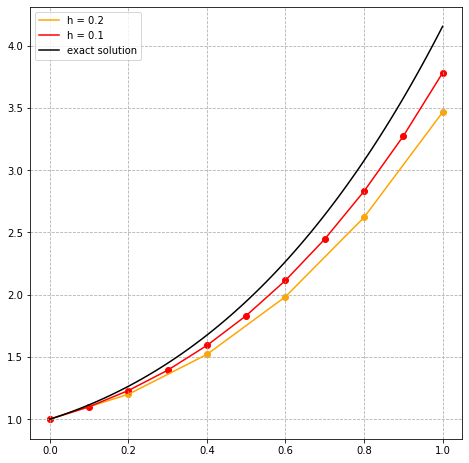

In [ ]:
#@title
x = x_i # y = 3*exp(x) - 2*x -2
Xex = [x]
Yex = [y_i]
h = 0.01
while x < 1:
  x += h
  Xex.append(x)
  Yex.append(3*exp(x) - 2*x -2)
#Plotting Solution:
fig1 = plt.figure(figsize=[6,6])
a1 = fig1.add_axes([0,0,1,1])
plt.grid(linestyle = 'dashed')
a1.plot(X1,Y1,color = "orange", linestyle = '-', label = 'h = '+str(0.2))
a1.scatter(X1,Y1,color = "orange")
a1.plot(X2,Y2,color = "red", linestyle = '-', label = 'h = '+str(0.1))
a1.scatter(X2,Y2,color = "red")
a1.plot(Xex,Yex,color = "black", linestyle = '-',label = 'exact solution')
leg = a1.legend();

Notice that Euler method *underestimates the exact solution*. <br>
Another interesting observation about the Euler method is that it may not be stable for larger step sizes. This is illustrated in the example below-

In [ ]:
f = lambda x, y : -y/2
x_i, x_max = 0, 20
y_i = 1
X1, Y1 = FEM(f, x_i, y_i, x_max, 1)
X2, Y2 = FEM(f, x_i, y_i, x_max, 4)
X3, Y3 = FEM(f, x_i, y_i, x_max, 4.2)

j =  0 | x =  1 | y =  0.5 | y' = f( 1 , 0.5 ) =  -0.5
j =  1 | x =  2 | y =  0.25 | y' = f( 2 , 0.25 ) =  -0.25
j =  2 | x =  3 | y =  0.125 | y' = f( 3 , 0.125 ) =  -0.125
j =  3 | x =  4 | y =  0.0625 | y' = f( 4 , 0.0625 ) =  -0.0625
j =  4 | x =  5 | y =  0.03125 | y' = f( 5 , 0.03125 ) =  -0.03125
j =  5 | x =  6 | y =  0.015625 | y' = f( 6 , 0.015625 ) =  -0.015625
j =  6 | x =  7 | y =  0.0078125 | y' = f( 7 , 0.0078125 ) =  -0.0078125
j =  7 | x =  8 | y =  0.00390625 | y' = f( 8 , 0.00390625 ) =  -0.00390625
j =  8 | x =  9 | y =  0.001953125 | y' = f( 9 , 0.001953125 ) =  -0.001953125
j =  9 | x =  10 | y =  0.0009765625 | y' = f( 10 , 0.0009765625 ) =  -0.0009765625
j =  10 | x =  11 | y =  0.00048828125 | y' = f( 11 , 0.00048828125 ) =  -0.00048828125
j =  11 | x =  12 | y =  0.000244140625 | y' = f( 12 , 0.000244140625 ) =  -0.000244140625
j =  12 | x =  13 | y =  0.0001220703125 | y' = f( 13 , 0.0001220703125 ) =  -0.0001220703125
j =  13 | x =  14 | y =  6.103515625e-05

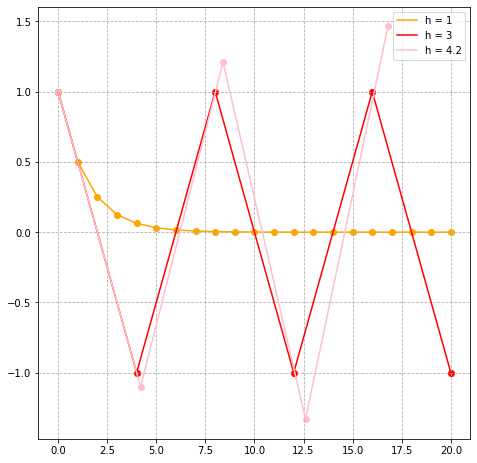

In [ ]:
#@title
#Plotting Solution:
fig1 = plt.figure(figsize=[6,6])
a1 = fig1.add_axes([0,0,1,1])
plt.grid(linestyle = 'dashed')
a1.plot(X1,Y1,color = "orange", linestyle = '-', label = 'h = '+str(1))
a1.scatter(X1,Y1,color = "orange")
a1.plot(X2,Y2,color = "red", linestyle = '-', label = 'h = '+str(3))
a1.scatter(X2,Y2,color = "red")
a1.plot(X3,Y3,color = "pink", linestyle = '-', label = 'h = '+str(4.2))
a1.scatter(X3,Y3,color = "pink")

leg = a1.legend();

In the above example we see how for the IVP:

$y' +\frac{1}{2}y = 0; y(0) =1; x\in[0,20]$

The Euler method is stable for $h<4$.
For $h\geq 4$, the solution *oscillates*.
___

In [ ]:
#Exercises
# y' = x-2y, y(0) = 1, h = 0.1,0.05
f = lambda x, y : x-2*y
x_i, x_max = 0, 1
y_i = 1
h = 0.1
X1, Y1 = FEM(f, x_i, y_i, x_max, h)
X2, Y2 = FEM(f, x_i, y_i, x_max, h/2)

j =  0 | x =  0.1 | y =  0.8 | y' = f( 0.1 , 0.8 ) =  -2
j =  1 | x =  0.2 | y =  0.65 | y' = f( 0.2 , 0.65 ) =  -1.5
j =  2 | x =  0.3 | y =  0.54 | y' = f( 0.3 , 0.54 ) =  -1.1
j =  3 | x =  0.4 | y =  0.462 | y' = f( 0.4 , 0.462 ) =  -0.78
j =  4 | x =  0.5 | y =  0.4096 | y' = f( 0.5 , 0.4096 ) =  -0.524
j =  5 | x =  0.6 | y =  0.37768 | y' = f( 0.6 , 0.37768 ) =  -0.31920000000000004
j =  6 | x =  0.7 | y =  0.362144 | y' = f( 0.7 , 0.362144 ) =  -0.15536000000000005
j =  7 | x =  0.8 | y =  0.3597152 | y' = f( 0.8 , 0.3597152 ) =  -0.024288000000000087
j =  8 | x =  0.9 | y =  0.36777216 | y' = f( 0.9 , 0.36777216 ) =  0.08056960000000002
j =  9 | x =  1.0 | y =  0.38421772800000004 | y' = f( 1.0 , 0.38421772800000004 ) =  0.16445568
------------------------
j =  0 | x =  0.05 | y =  0.9 | y' = f( 0.05 , 0.9 ) =  -2
j =  1 | x =  0.1 | y =  0.8125 | y' = f( 0.1 , 0.8125 ) =  -1.75
j =  2 | x =  0.15 | y =  0.73625 | y' = f( 0.15 , 0.73625 ) =  -1.525
j =  3 | x =  0.2 | y =  0.6

In [ ]:
#Exercises
# y' = x+y, y(0)=2, h = 0.1, 0.2
f = lambda x, y : x + y
x_i, x_max = 0, 1
y_i = 2
h = 0.1
X1, Y1 = FEM(f, x_i, y_i, x_max, h)
X2, Y2 = FEM(f, x_i, y_i, x_max, h*2)

j =  0 | x =  0.1 | y =  2.2 | y' = f( 0.1 , 2.2 ) =  2
j =  1 | x =  0.2 | y =  2.43 | y' = f( 0.2 , 2.43 ) =  2.3000000000000003
j =  2 | x =  0.3 | y =  2.693 | y' = f( 0.3 , 2.693 ) =  2.6300000000000003
j =  3 | x =  0.4 | y =  2.9923 | y' = f( 0.4 , 2.9923 ) =  2.993
j =  4 | x =  0.5 | y =  3.3315300000000003 | y' = f( 0.5 , 3.3315300000000003 ) =  3.3923
j =  5 | x =  0.6 | y =  3.7146830000000004 | y' = f( 0.6 , 3.7146830000000004 ) =  3.8315300000000003
j =  6 | x =  0.7 | y =  4.1461513000000005 | y' = f( 0.7 , 4.1461513000000005 ) =  4.3146830000000005
j =  7 | x =  0.8 | y =  4.63076643 | y' = f( 0.8 , 4.63076643 ) =  4.846151300000001
j =  8 | x =  0.9 | y =  5.1738430730000005 | y' = f( 0.9 , 5.1738430730000005 ) =  5.43076643
j =  9 | x =  1.0 | y =  5.781227380300001 | y' = f( 1.0 , 5.781227380300001 ) =  6.073843073000001
------------------------
j =  0 | x =  0.2 | y =  2.4 | y' = f( 0.2 , 2.4 ) =  2
j =  1 | x =  0.4 | y =  2.92 | y' = f( 0.4 , 2.92 ) =  2.6
j =  2 

In [ ]:
# Eg. y' = -2xy^2, y(0) = 1, 
f = lambda x, y : -2*x*y**2
x_i, x_max = 0, 1
y_i = 1
h = 0.2
X1, Y1 = FEM(f, x_i, y_i, x_max, h) #h=0.2
#X2, Y2 = FEM(f, x_i, y_i, x_max, h/2) #h=0.1
#X2, Y2 = FEM(f, x_i, y_i, x_max, h/4) #h=0.05

j =  0 | x =  0.2 | y =  1.0 | y' = f( 0.2 , 1.0 ) =  0
j =  1 | x =  0.4 | y =  0.9199999999999999 | y' = f( 0.4 , 0.9199999999999999 ) =  -0.4
j =  2 | x =  0.6 | y =  0.7845759999999999 | y' = f( 0.6 , 0.7845759999999999 ) =  -0.6771199999999999
j =  3 | x =  0.8 | y =  0.6368417200537599 | y' = f( 0.8 , 0.6368417200537599 ) =  -0.7386713997311999
j =  4 | x =  1.0 | y =  0.5070601596054298 | y' = f( 1.0 , 0.5070601596054298 ) =  -0.6489078022416505
------------------------


##4. <ins>Backward Euler Method</ins>: $y_{j+1} = y_{j} + hf_{j+1}$

Backward Euler Method (BEM) is a **single step**, **first order**, **implicit method**.

According to the Backward Euler Method, or the *Backward Difference Approximation*,

$\boxed{y_{j+1} = y_j + hf(x_{j+1}, y_{j+1}, h) + O(h^2) };\hspace{3mm}j = 0,1,...,N-1$

If f(x,y) is non-linear in y, the resulting algebraic equation will be non-linear. We can solve this equation using Newton Rhapson Method.

A brief explanation of Newton Rhapson Method:
> We take $F(y_{j+1}) = y_{j+1} - y_{j} - hf(x_{j+1}, y_{j+1})\\ \implies F'(y_{j+1}) = 1 -hf'(x_{j+1},y_{j+1})$

In NR we use F,F'

>  $y_{j+1}^{(s+1)} = y_{j+1}^{(s)} - \frac{F(y_{j+1}^{(s)})}{F'(y_{j+1}^{(s)})}, s = 0,1,...$
>> Note: We take $y_{j+1}^{(0)} = y_j$

We continue with Newton Rhapson till it converges.
For 1 value of 's', we continue with the method till it converges upto 4 decimal places.





In [ ]:
# @title Backward Euler Code
#BACKWARD EULER with Newton-Rhapson Sub-Procedure
def BEM(f, f_, x_i, y_i, x_max, h):
  print("Backward Euler Method")
  x = x_i
  y_j = y_i
  # F and F' for NR Method
  F = lambda yj1s, y_j, x : yj1s - y_j - h*f(x,yj1s)
  F_ = lambda yj1s, x : 1 - h*f_(x,yj1s)

  Ylist = [y_i]
  Xlist = [x_i]
  j = 0
  steps = int((x_max-x_i)/h)
  while j < steps:
    s = 0
    y_j1s = y_j
    x = round(x+h, 4) 
    print("j = ",j,"| x[j+1] = ",x,"| y[j] = ", y_j)
    while s+1:
      y_prev = y_j1s
      y_j1s = y_j1s - F(y_j1s, y_j, x)/F_(y_j1s, x)
      print(" s = ",s,": y[j+1][s+1] = ",y_j1s,"| F = ",F(y_prev, y_j, x), "| F' = ", F_(y_prev, x))
      s+=1
      if abs(abs(y_j1s)-abs(y_prev)) < 0.0001: break
    y_j = y_j1s
    Xlist.append(x)
    Ylist.append(y_j)
    j+=1
  print("------------------------")
  return Xlist,Ylist

### Questions on BEM

Q. Solve the IVP:

$u' = -2tu^2, u(0) = 1\\ 
\text{with h= 0.2, on the interval [0,0.4] using the backward Euler method.}$

In [ ]:
f = lambda x, y : -2*x*(y**2)
f_ = lambda x, y : -4*x*(y)

x_i, x_max = 0, 0.4
y_i = 1
h = 0.2

X,Y = BEM(f, f_, x_i, y_i, x_max, h)

j =  0 | x[j+1] =  0.2 | y[j] =  1
 s =  0 : y[j+1][s+1] =  0.9310344827586207 | F =  0.08000000000000002 | F' =  1.1600000000000001
 s =  1 : y[j+1][s+1] =  0.9307033158090823 | F =  0.0003804994054696642 | F' =  1.1489655172413793
 s =  2 : y[j+1][s+1] =  0.9307033081725358 | F =  8.773723914057285e-09 | F' =  1.1489125305294532
j =  1 | x[j+1] =  0.4 | y[j] =  0.9307033081725358
 s =  0 : y[j+1][s+1] =  0.8239143517296632 | F =  0.13859338365492835 | F' =  1.2978250586152114
 s =  1 : y[j+1][s+1] =  0.8224704256018196 | F =  0.0018246209949052405 | F' =  1.2636525925534923
 s =  2 : y[j+1][s+1] =  0.82247016151844 | F =  3.335876259530357e-07 | F' =  1.2631905361925824
------------------------


Exact values for the above problem are:
$u(0.2) = 0.96153846, u(0.4) = 0.86206897$

Observe that the BE method underestimates in this case.

##5. <ins>Modified Euler Method</ins>: $y_{j+1} = \frac{h}{2}(f(x_j,y_j)+f(x_{j+1},y_{j+1}))$


###(a) Trapezoidal Approximation method

Modified Euler Method (MEM) is a **single step**, **second order** ($O(h^2)$), **implicit method**.

According to the Modified Euler Method,

$\boxed{y_{j+1} = y_j + \frac{h}{2}[f(x_{j}, y_{j})+f(x_{j+1}, y_{j+1})] + O(h^3) };\hspace{3mm}j = 0,1,...,N-1$

If f(x,y) is non-linear in y, the resulting algebraic equation will be non-linear. We can solve this equation using Newton Rhapson Method.

A brief explanation of Newton Rhapson Method:
> We take $F(y_{j+1}) = y_{j+1} - y{j} - hf(x_{j+1}, y_{j+1})\\ \implies F'(y_{j+1}) = 1 -hf'(x_{j+1},y_{j+1})$

>  $y_{j+1}^{(s+1)} = y_{j+1}^{(s)} - \frac{F(y_{j+1}^{(s)})}{F'(y_{j+1}^{(s)})}, s = 0,1,...$
>> Note: We take $y_{j+1}^{(0)} = y_j$

We continue with Newton Rhapson till it converges.
For 1 value of 's', we continue with the method till it converges upto 4 decimal places.

In [ ]:
# @title Modified Euler Code
#MODIFIED EULER METHOD
def MEM_NR(f, x_i, y_i, x_max, h):
  print("Modified Euler Method")
  count = 0
  x = x_i
  y = y_i
  Ylist = [y_i]
  Xlist = [x_i]
  steps = int((x_max-x_i)/h)
  while count < steps:
    fnc = f(x,y)
    y = y + h*f(x+h/2, y+h/2*fnc)
    x = round(x+h, 4) 
    Xlist.append(x)
    Ylist.append(y)
    print("j = ",count,"| x = ",x,"| y = ", y,"| y' = f(",x,",",y,") = ", fnc)
    count+=1
  print("------------------------")
  return Xlist,Ylist

In [ ]:
def FEMs(f, x_i, y_i, x_max, h):
  count = 0
  x = x_i
  y = y_i
  Ylist = [y_i]
  Xlist = [x_i]
  steps = int((x_max-x_i)/h)
  while count < steps:
    fnc = f(x,y)
    y = y + h*f(x, y)
    x = round(x+h, 4) 
    Xlist.append(x)
    Ylist.append(y)
    #print("j = ",count,"| x = ",x,"| y = ", y,"| y' = f(",x,",",y,") = ", fnc)
    count+=1
  print("------------------------")
  return y
#Modified EULER with Forward Euler Sub-Procedure
def MEM_FE(f, x_i, y_i, x_max, h):
  print("Modified Euler Method, with Forward Euler Sub-Procedure")
  x = x_i
  y_j = y_i
  Ylist = [y_i]
  Xlist = [x_i]
  j = 0
  steps = int((x_max-x_i)/h)
  while j < steps:
    s = 0
    y_j1s = FEMs(f,x,y_j,x+h,h)
    print("j = ",j,"| x[j+1] = ",x,"| y[j] = ", y_j)
    while s+1:
      y_prev = y_j1s
      y_j1s = y_j + h/2*(f(x,y_j)+(f(x+h,y_j1s)))
      print(" s = ",s,": y[j+1][s+1] = ",y_j1s)
      s+=1
      if abs(abs(y_j1s)-abs(y_prev)) < 0.001: break
    y_j = round(y_j1s,3)
    x+=h
    print("j = ",j,"| x = ",x,"| y = ", y_j)
    Xlist.append(x)
    Ylist.append(y_j)
    j+=1
  print("------------------------")
  return Xlist,Ylist

### Questions on MEM

In [ ]:
#Modified Euler Method
# f = lambda x, y : x + abs(sqrt(y))
f = lambda x, y : x**2 + y
x_i, x_max = 0, 0.2
y_i = 0.94
h = 0.1

MEM_NR(f, x_i, y_i, x_max, h)

j =  0 | x =  0.1 | y =  1.03895 | y' = f( 0.1 , 1.03895 ) =  0.94
j =  1 | x =  0.2 | y =  1.15033975 | y' = f( 0.2 , 1.15033975 ) =  1.04895
------------------------


([0, 0.1, 0.2], [0.94, 1.03895, 1.15033975])

In [ ]:
#Eg.2) y' = 2x+y, y(0) = 1, to find y(0.2), y(0.4) using Forward Euler as a sub-procedure
f = lambda x, y : 2*x + y
x_i, x_max = 0, 0.4
y_i = 1
h = 0.2

MEM_FE(f, x_i, y_i, x_max, h)

------------------------
j =  0 | x[j+1] =  0 | y[j] =  1
 s =  0 : y[j+1][s+1] =  1.26
 s =  1 : y[j+1][s+1] =  1.266
 s =  2 : y[j+1][s+1] =  1.2666
j =  0 | x =  0.2 | y =  1.267
------------------------
j =  1 | x[j+1] =  0.2 | y[j] =  1.267
 s =  0 : y[j+1][s+1] =  1.6737399999999998
 s =  1 : y[j+1][s+1] =  1.6810739999999997
 s =  2 : y[j+1][s+1] =  1.6818073999999998
j =  1 | x =  0.4 | y =  1.682
------------------------


([0, 0.2, 0.4], [1, 1.267, 1.682])

### (b) Modified Euler Method (improved) $y_{j+1} = hf(x_j+\frac{h}{2}, y_j+\frac{h}{2}f(x_j,y_j))$


##6. <ins>Mid-Point Method/ Nyström Method</ins>: $y_{j+1} = y_{j-1} +2hf_j$

This is a *2-step* (multistep), **2nd order**, **explicit** method.

According to the Mid-Point Method,

$\boxed{y_{j+1} = y_{j-1} + 2{h}[f(x_{j}, y_{j})] + O(h^2) };\hspace{3mm}j = 0,1,...,N-1$

Given a $y_{j-1} \text{ we calculate } y_{j} \text{ from the Taylor Series Method/ Forward Euler method }.$


In python we have to enter all the higher order derivative terms. This procedure is much simpler to code out on Mathematica. 

In [ ]:
# @title Taylor Code
def Taylor(order, flist, x_0, y_0, h, x_max,roundoff = 8):
  print("Taylor Series Approximation of Order ",order)
  if len(flist)!= order:  
    print("Enter the function list with sufficient number of derivatives.")
    return
  steps = int((x_max-x_0)/h)
  y = y_0
  x = x_0
  for i in range(steps):
    y_curr = y
    for k in range(len(flist)):
      print((h**(k+1))*flist[k](x,y_curr)/fact(k+1))
      y += (h**(k+1))*flist[k](x,y_curr)/fact(k+1)
    x += h
    y = round(y,5)
    print(i,": y(",x,") = ",y)
  print("------------------------")
  return y

In [ ]:
f = lambda x, y : x*y
f_ = lambda x, y : y + x*x*y
f__ = lambda x, y : 2*x*y + x*(y + x*x*y)
f___ = lambda x, y : 3*(y + x*x*y) + x*(2*x*y + x*(y + x*x*y))
Taylor(4,[f,f_,f__,f___], 0, 1, 0.1,0.1)

Taylor Series Approximation of Order  4
0.0
0.005000000000000001
0.0
1.25e-05
0 : y( 0.1 ) =  1.0050124999999999
------------------------


1.0050124999999999

In [ ]:
# @title Mid Point Method Code
def MPM(f, x_0, y_0, y_1, x_max, h):
  print("Mid Point Method")
  count = 0
  x = [x_0,x_0+h,x_0+2*h]
  y = [y_0, y_1,0]

  Ylist = [y[0],y[1]]
  Xlist = [x[0],x[1]]
  while x[2] <= x_max:
    fnc = f(x[1],y[1])
    y[2] = y[0] + 2*h*fnc
    Xlist.append(x[2])
    Ylist.append(y[2])
    print("j = ",count+1,": y(",x[0],") = ",y[0],"| y(",x[1],") = ",y[1],"| y(",x[2],") = ",y[2])
    for k in range(3):  x[k] += h
    y[0] = y[1]
    y[1] = y[2]
    count+=1
  print("------------------------")
  return Xlist,Ylist

### Questions on MPM

Q1. Solve the IVP:

$u' = -2tu^2, u(0) = 1\\ 
\text{with h= 0.2, on the interval [0,1] using the mid-point method.}$

In [ ]:
f = lambda x, y : -2*x*(y**2)
f_ = lambda x, y : -2*x*(2*y)*(-2*x*(y**2)) -2*(y**2)
x_0, x_max = 0, 1
y_0 = 1
h = 0.2
y_1 = Taylor(2,[f,f_], x_0, y_0, h,1)
X1, Y1 = MPM(f, x_0, y_0, y_1, x_max, h)

Taylor Series Approximation of Order  2
0.0
-0.04000000000000001
0 : y( 0.2 ) =  0.96
-0.073728
-0.031201689600000006
1 : y( 0.4 ) =  0.8550703103999999
-0.11698323771640835
-0.013241186487379486
2 : y( 0.6000000000000001 ) =  0.724845886196212
-0.1260963740965373
0.0009200427773291999
3 : y( 0.8 ) =  0.5996695548770039
-0.1150731440148429
0.007697732534041667
4 : y( 1.0 ) =  0.49229414339620264
------------------------
j =  1 : y( 0 ) =  1 | y( 0.2 ) =  0.49229414339620264 | y( 0.4 ) =  0.9612234362204478
j =  2 : y( 0.2 ) =  0.49229414339620264 | y( 0.4 ) =  0.9612234362204478 | y( 0.6000000000000001 ) =  0.19662998520758013
j =  3 : y( 0.4 ) =  0.9612234362204478 | y( 0.6000000000000001 ) =  0.19662998520758013 | y( 0.8 ) =  0.9426650277007359
j =  4 : y( 0.6000000000000001 ) =  0.19662998520758013 | y( 0.8 ) =  0.9426650277007359 | y( 1.0 ) =  -0.3720851216404386
------------------------


Exact solution is $u(t) = 1/(1+t^2)$

In [ ]:
x = x_0 # y = 1/(1+x**2)
Xex = [x]
Yex = [y_0]
h = 0.01
while x < 1:
  x += h
  Xex.append(x)
  Yex.append(1/(1+x**2))

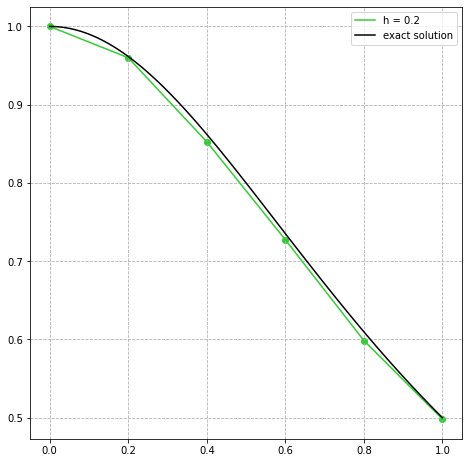

In [ ]:
# @title
#Plotting Solution:
fig1 = plt.figure(figsize=[6,6])
a1 = fig1.add_axes([0,0,1,1])
plt.grid(linestyle = 'dashed')
a1.plot(X1,Y1,color = "limegreen", linestyle = '-', label = 'h = '+str(0.2))
a1.scatter(X1,Y1,color = "limegreen")
a1.plot(Xex,Yex,color = "black", linestyle = '-',label = 'exact solution')
leg = a1.legend();

## <ins>Runge Kutta Methods</ins>

RK methods do not require computation of higher order derivatives manually, unlike the Taylor Series method. 

Derivation of RK method:

Integrating the differential equation $y' = f(x,y)$ on the interval $[x_j,x_{j+1}]$, we get

$\int_{x_j}^{x_{j+1}}\frac{dy}{dx}dx = \int_{x_j}^{x_{j+1}}f(x,y)dx$

By mean value theorem of calculus, we get 
> $y(x_{j+1}) = y(x_j) + hf(x_j+\theta h, y(x_j+\theta h))\hspace{10mm}|0<\theta<1$

> Case $\theta = 0$: $y(x_{j+1}) = y(x_j) + hf(x_j, y(x_j)) = y_j +hf(x_j,y_j)\hspace{10mm}|\text{Forward Euler method}$

> Case $\theta = 1$: $y(x_{j+1}) = y(x_j) + hf(x_{j+1}, y(x_{j+1})) = y_j +hf(x_{j+1},y_{j+1})\hspace{8mm}|\text{Backward Euler method}$

> Case $\theta = 1/2$: $y(x_{j+1}) = y(x_j) + hf(x_{j} +\frac{h}{2}, y(x_{j}+\frac{h}{2})) \approx y_j +\frac{1}{2}[K_1 +K_2]\hspace{8mm}|\text{Euler Cauchy method}\\
\text{ where } K_1 = hf_j ;\hspace{5mm} K_2 = hf(x_{j+1}, y_j+K_1)$

Euler Cauchy method formula can be proved by using mean approximation and Euler method.




In [ ]:
# @title Euler Cauchy Code (Heun Method)
def ECauchy(f, x_i, y_i, x_max, h):
  print("Euler Cauchy Method")
  k1 = lambda x,y : h*f(x,y)
  k2 = lambda x,y : h*f(x + h,y + 1*k1(x,y))
  k2_ = lambda x,y, K1 : h*f(x + h,y + 1*K1)
  count = 0
  x = x_i
  y = y_i
  Ylist = [y_i]
  Xlist = [x_i]
  while x < x_max:
    fnc = f(x,y)
    K1 = k1(x,y)
    K2 = k2_(x,y,K1)
    y = y + (K1+K2)/2
    x = round(x+h, 5) 
    Xlist.append(x)
    Ylist.append(y)
    print("j = ",count,"K1 = ",K1,"| K2 = ",K2,"| x = ",x,"| y = ", y,"| y' = f(",x,",",y,") = ", fnc)
    count+=1
  print("------------------------")
  return Xlist,Ylist

In [ ]:
x_i, x_max = 0, 0.2
y_i = 1
h = 0.1
f = lambda x, y : x+y

ECauchy(f, x_i, y_i, x_max, h)

j =  0 K1 =  0.1 | K2 =  0.12000000000000002 | x =  0.1 | y =  1.11 | y' = f( 0.1 , 1.11 ) =  1
j =  1 K1 =  0.12100000000000002 | K2 =  0.1431 | x =  0.2 | y =  1.24205 | y' = f( 0.2 , 1.24205 ) =  1.2100000000000002
------------------------


([0, 0.1, 0.2], [1, 1.11, 1.24205])

In [ ]:
x_i, x_max = 0, 0.4
y_i = 1
h = 0.2
f = lambda x, y : -2*x*y**2

ECauchy(f, x_i, y_i, x_max, h)

In [ ]:
# EULER CAUCHY METHOD
x_i, x_max = 0, 0.4
y_i = 1
h = 0.2
f = lambda x, y : -2*x*y**2

ECauchy(f, x_i, y_i, x_max, h)

j =  0 K1 =  0.0 | K2 =  -0.08000000000000002 | x =  0.2 | y =  0.96 | y' = f( 0.2 , 0.96 ) =  0
j =  1 K1 =  -0.073728 | K2 =  -0.12567648927744 | x =  0.4 | y =  0.86029775536128 | y' = f( 0.4 , 0.86029775536128 ) =  -0.36864
------------------------


([0, 0.2, 0.4], [1, 0.96, 0.86029775536128])

___
RK methods use a *weight average* of slopes on the given interval [$x_j,x_{j+1}$] instead of a single slope (i.e. slope at a single point in the interval).

RK method with v-slopes on [$x_j,x_{j+1}$] is written as $y_{j+1} = y_{j} + W_1K_1+ W_2K_2+...+W_vK_v$
where

$K_1 = hf(x_j+c_1h, y_j+a_{11}K_1+ a_{12}K_2+...+a_{1v}K_v)\\
K_2 = hf(x_j+c_2h, y_j+a_{21}K_1+ a_{22}K_2+...+a_{2v}K_v)\\
...\\
K_v = hf(x_j+c_vh, y_j+a_{v1}K_1+ a_{v2}K_2+...+a_{vv}K_v)$

This is also called the v-stage RK method ($ W_i's,c_i's , a_i's $) are yet to be determined based on the desired order of the method. 

The $a_i's$ can be represented using the coefficient matrix $A = \begin{pmatrix}a_{11} & a_{12} & ... &a_{1v} 
\\a_{21} & a_{22} & ... &a_{2v} 
\\... & ... & ... &... 
\\a_{v1} & a_{v2} & ... &a_{vv} \end{pmatrix} $

If we set all the elements of $A$ on the diagonal and upper triangular part to zero, we get the **explicit methods** where - <br>

$K_1 = hf(x_j, y_j)\\
K_2 = hf(x_j+c_2h, y_j+a_{21}K_1)\\
K_3 = hf(x_j+c_2h, y_j+a_{31}K_1+a_{32}K_2+a_{33}K_3)\\
...\\
K_v = hf(x_j+c_vh, y_j+a_{v1}K_1+ a_{v2}K_2+...+a_{v,v-1}K_v)$




## <ins>Explicit RK Methods</ins>

### 2nd Order RK Method (Explicit)

$y_{j+1} = y_{j} + W_1K_1 + W_2K_2$

$K_1 = hf(x_j, y_j) \\
K_2 = hf(x_j + c_2h, y_j + a_{21}K_1)$

We choose the unknown parameters $W_1, W_2, c_2, a_{21}$ s.t. $y_{j+1}$ is closer to $y(x_{j+1})$

We find the Taylor Series expansion about $x_j$, which ultimately gives us:

$W_1 +W_2 = 1\\
c_2W_2 = 1/2\\
a_{21}W_2 = 1/2$

So we get $a_{21} = c_{2}, W_2 = \frac{1}{2c_2}, W_1 = 1-\frac{1}{2c_2}$

The choice of $c_2$ is arbitrary, $c_2\in(0, 1]$.

For convenience, a value is chosen such that one of the $W_i$s becomes 0.

###Modified Euler Cauchy

This method is obtained by setting $c_2 = 1/2$, which makes $W_1 = 0$.

$y_{j+1} = y_j + K_2\\
K1 = hf(x_j,y_j)\\
K_2 = hf(x_j+\frac{h}{2}, y_j +\frac{K_1}{2})$.

This is Euler's method with spacing h/2.

In [ ]:
# @title Modified Euler Cauchy Code
def MECauchy(f, x_i, y_i, x_max, h):
  print("Modified Euler Cauchy Method")
  k1 = lambda x,y : h*f(x,y)
  k2 = lambda x,y : h*f(x + h/2,y + k1(x,y)/2)
  k2_ = lambda x,y, K1 : h*f(x + h/2,y + K1/2)
  count = 0
  x = x_i
  y = y_i
  Ylist = [y_i]
  Xlist = [x_i]
  while x < x_max:
    fnc = f(x,y)
    K1 = k1(x,y)
    K2 = k2_(x,y,K1)
    y = y + K2
    x = round(x+h, 5) 
    Xlist.append(x)
    Ylist.append(y)
    print("j = ",count,"K1 = ",K1,"| K2 = ",K2,"| x = ",x,"| y = ", y,"| y' = f(",x,",",y,") = ", fnc)
    count+=1
  print("------------------------")
  return Xlist,Ylist

In [ ]:
# MODIFIED EULER CAUCHY METHOD
x_i, x_max = 0, 0.4
y_i = 1
h = 0.2
f = lambda x, y : -2*x*y**2

MECauchy(f, x_i, y_i, x_max, h)

j =  0 K1 =  0.0 | K2 =  -0.04000000000000001 | x =  0.2 | y =  0.96 | y' = f( 0.2 , 0.96 ) =  0
j =  1 K1 =  -0.073728 | K2 =  -0.10226160893952002 | x =  0.4 | y =  0.8577383910604799 | y' = f( 0.4 , 0.8577383910604799 ) =  -0.36864
------------------------


([0, 0.2, 0.4], [1, 0.96, 0.8577383910604799])

###General 2nd Order Explicit RK

In [ ]:
#@title 2nd ORDER RK (Explicit,General) Code
def RK2(f, x_i, y_i, x_max, h, c2 = 1/2):
  print("2nd ORDER RK (Explicit) Method")
  W2 = 1/2/c2
  W1 = 1-W2
  k1 = lambda x,y : h*f(x,y)
  k2 = lambda x,y : h*f(x + c2*h,y + c2*k1(x,y))
  k2_ = lambda x,y, K1 : h*f(x + c2*h,y + c2*K1)
  count = 0
  x = x_i
  y = y_i
  Ylist = [y_i]
  Xlist = [x_i]
  steps = int((x_max-x_i)/h)
  while count < steps:
    fnc = f(x,y)
    K1 = k1(x,y)
    K2 = k2_(x,y,K1)
    y = y + W1*K1+W2*K2
    x = round(x+h, 5) 
    Xlist.append(x)
    Ylist.append(y)
    print("j = ",count,"K1 = ",K1,"| K2 = ",K2,"| x = ",x,"| y = ", y)#,"| y' = f(",x,",",y,") = ", fnc)
    count+=1
  print("------------------------")
  return Xlist,Ylist

In [ ]:
#2nd ORDER RUNGE KUTTA : General
x_i, x_max = 0, 0.4
y_i = 1
h = 0.2
f = lambda x, y : -2*x*y**2
c2 = 1/2
RK2(f, x_i, y_i, x_max, h)

2nd ORDER RK (Explicit) Method
j =  0 K1 =  0.0 | K2 =  -0.04000000000000001 | x =  0.2 | y =  0.96
j =  1 K1 =  -0.073728 | K2 =  -0.10226160893952002 | x =  0.4 | y =  0.8577383910604799
------------------------


([0, 0.2, 0.4], [1, 0.96, 0.8577383910604799])

###4th Order RK Method (Explicit) : $𝑢_{𝑗+1}=𝑢_𝑗+(𝐾_1+2𝐾_2+2𝐾_3+𝐾_4)/6$

$y_{j+1} = y_{j} + W_1K_1 + W_2K_2+ W_3K_3 + W_4K_4$

$K_1 = hf(x_j, y_j) \\
K_2 = hf(x_j + c_2h, y_j + a_{21}K_1)\\
K_3 = hf(x_j + c_3h, y_j + a_{31}K_1+ a_{32}K_2)\\
K_4 = hf(x_j + c_4h, y_j + a_{41}K_1+ a_{42}K_2+a_{43}K_3)$

We choose the unknown parameters $W_1, W_2,W_3, W_4, c_2,c_3,c_4, a_{21},a_{31},a_{32},a_{41},a_{42},a_{43}$ s.t. $y_{j+1}$ is closer to $y(x_{j+1})$.

We find the Taylor Series expansion about $x_j$, which ultimately gives us:

$c_2 = a_{21}\\
c_3 = a_{31}+a_{32}\\
c_4 = a_{41}+a_{42}+a_{43}\\
W_1 +W_2+W_3 +W_4 = 1\\
c_2W_2+c_3W_3+c_4W_4 = 1/2\\
c_2^2W_2+c_3^2W_3+c_4^2W_4 = 1/3\\
c_{2}a_{32}W_3+(c_{2}a_{42}+c_{3}a_{43})W_4 = 1/6\\
c_2^3W_2+c_3^3W_3+c_4^3W_4 = 1/4\\...$

We end up with 11 equations and 13 unknowns, leaving 2 arbitrary parameters. 

Since the terms upto $O(h^4)$ are compared the truncation error is of $O(h^5)$ and the order of the method is 4. 

The simplest solution is-<br>
$c_2=c_3=1/2, c_4 = 1,\\
W_2 = W_3 = 1/3,\\
W_1 = W_4 = 1/6,\\
a_{21} = 1/2,a_{31} = 0,a_{32} = 1/2,a_{41} = a_{42} = 0,a_{43} = 1$
<br><br>
The 4th order explicit RK method is:
$
u_{j+1} = u_{j} +\frac{1}{6}(K_1+2K_2+2K_3+K_4)\\
K1 = hf(x_j,y_j)\\
K2 = hf(x_j + h/2,y_j + K_1/2)\\
K3 = hf(x_j + h/2,y_j + K_2/2)\\
K4 = hf(x_j+h,y_j+K_3)
$


In [ ]:
#@title 4th ORDER RUNGE KUTTA CODE

def RK4(f, x_i, y_i, x_max, h):
  k1 = lambda x,y : h*f(x,y)
  k2 = lambda x,y : h*f(x + h/2,y + k1(x,y)/2)
  k3 = lambda x,y : h*f(x + h/2,y + k2(x,y)/2)
  k4 = lambda x,y : h*f(x+h,y+k3(x,y))
  count = 0
  x = x_i
  y = y_i
  Ylist = [y_i]
  Xlist = [x_i]
  roundoff = 7
  while x <= x_max:
    fnc = f(x,y)
    k_1 = round(k1(x,y),roundoff)
    k_2 = round(k2(x,y),roundoff)
    k_3 = round(k3(x,y),roundoff)
    k_4 = round(k4(x,y),roundoff)
    # print(count)
    print("j = ",count,"K1 = ",k_1,"| K2 = ",k_2,"| K3 = ",k_3,"| K4 = ",k_4,)
    # y = y + (k1(x,y)+2*k2(x,y)+2*k3(x,y)+k4(x,y))/6
    y = round(y + (k_1+2*k_2+2*k_3+k_4)/6, roundoff)
    x = round(x+h, roundoff) 
    # print("x = ",x,"| y = ", y,"| y' = f(x,y) = ", fnc)
    print("y(",x,")= ", y)#,"| y' = f(x,y) = ", fnc)
    Xlist.append(x)
    Ylist.append(y)
    count+=1
  print("------------------------")
  return Xlist,Ylist



j =  0 K1 =  0.0 | K2 =  -0.04 | K3 =  -0.038416 | K4 =  -0.0739715
y( 0.2 )=  0.9615328
j =  1 K1 =  -0.0739636 | K2 =  -0.1025753 | K3 =  -0.0994255 | K4 =  -0.1189166
y( 0.4 )=  0.8620525
j =  2 K1 =  -0.1189015 | K2 =  -0.1288339 | K3 =  -0.1272445 | K4 =  -0.1295863
y( 0.6 )=  0.7352784
------------------------


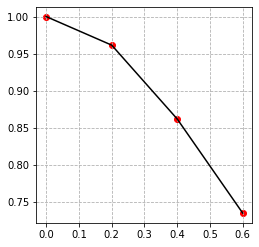

In [ ]:
f = lambda x, y : -2*x*y**2
x_i, x_max = 0, 0.4
y_i = 1
h = 0.2
X,Y=RK4(f, x_i, y_i, x_max, h)


#Plotting Solution:
fig1 = plt.figure(figsize=[3,3])
a1 = fig1.add_axes([0,0,1,1])
plt.grid(linestyle = 'dashed')
a1.plot(X,Y,color = "black", linestyle = '-')
a1.scatter(X,Y,color = "red")

## <ins>Implicit RK Methods with v-slopes</ins>



Implicit RK method using v-slopes is defined as :

$y_{j+1} = y_{j} + \sum_{m=1}^{v}W_mK_m$
<br>where<br>
$K_i = hf(x_j +c_ih, y_j +\sum_{m=1}^{v}a_{im}K_m)$
<br>where<br>
$c_i = \sum_{j=1}^{v}a_{ij}$ , for each i, and $a_{ij}, 1\leq i,j\leq v, W_1,...,W_v$ are arbitrary parameters. The slopes $K_m$ are defined implicitly.

The number of unknown parameters is $v.v + v = v(v+1)$

### 2nd Order Implicit RK Method

If we take v = 1 we end up with-

$\boxed{y_{j+1} = y_j + K_1}\\
\boxed{K_1 = hf(x_{j} +\frac{1}{2}h, y_{j} + \frac{1}{2}K_1)}$

(derivation on page 457 of textbook).

### 4th Order Implicit RK Method

With v = 2, we get-

$\boxed{y_{j+1} = y_j + \frac{K_{1} + K_2}{2}}\\
\boxed{K_1 = hf(x_{j} +\frac{3-\sqrt{3}}{6}h, y_{j} + \frac{1}{4}K_1+\frac{3-2\sqrt{3}}{12}K_2)}\\
\boxed{K_2 = hf(x_{j} +\frac{3+\sqrt{3}}{6}h, y_{j} + \frac{1}{4}K_2+\frac{3+2\sqrt{3}}{12}K_1)}$

To obtain $K_1,K_2$, we need to solve a system of 2 nonlinear algebraic equations in two unknowns $K_1, K_2$.

(derivation on page 457 of textbook).

### Mathematica Code for 4th Order Implicit RK

(I'm sure there is a shortcut but I coded this out when I was new to Mathematica so this is the entire procedure using the Newton-Rhapson Method as a sub-procedure).

```
f[x1_,y1_] = (y1^2 + x1 y1 - x1^2)/(x1^2);
h = 0.025;
x = Range[1,1.5,h];
y = Range[1,1.5,h];
y[[1]] = 2
j = 1;
Kvar = {k1,k2};

While[j<Length[x], 
K1[k1_,k2_] := h f[x[[j]] +(3-Sqrt[3]) h/6,y[[j]]+k1/4 + (3-2 Sqrt[3]) k2/12];
K2[k1_,k2_] := h f[x[[j]] +(3+Sqrt[3]) h/6,y[[j]]+k2/4 + (3+2 Sqrt[3]) k1/12];
Kfuncs = {k1 - K1[k1,k2],k2 - K2[k1,k2]};
K[0] = Transpose[{h f[x[[j]],y[[j]]],h f[x[[j]],y[[j]]]}];
tempK1 = K[0][[1]];tempK2 = K[0][[2]];
(*K[1] = K[0] - Inverse[D[Kfuncs,{Kvar}]/.{ k1 -> tempK1,k2 -> tempK2}].Transpose[Kfuncs/.{ k1 -> tempK1,k2 -> tempK2}];*)
K[1] = K[0] - Transpose[D[Kfuncs,{Kvar}]/.{ k1 -> tempK1,k2 -> tempK2}].Transpose[Kfuncs/.{ k1 -> tempK1,k2 -> tempK2}];
n = 1;
While[Norm[K[n]-K[n-1]] > 0.00001,
tempK1 = K[n][[1]];tempK2 = K[n][[2]];
n++;
K[n] = K[n-1] - Transpose[D[Kfuncs,{Kvar}]/.{ k1 -> tempK1,k2 -> tempK2}].Transpose[Kfuncs/.{ k1 -> tempK1,k2 -> tempK2}];];
y[[j+1]] = y[[j]] + (K[n][[1]]+K[n][[2]])/2;

j++;
]
(******* *)
Print[x,"\n",y]
```

## <ins>System of Equations</ins>

**Reducing higher order equations to a system of equations**

The nth Order ODE $y^{(n)} + a_{1}y^{(n-1)} +...+ a_{n-1}y +a_{n} = 0\\where\\y^{(i)}(a) = \alpha_i;\hspace{5mm}i = 0,1,...,n-1$

Can be written as a system of $m$ first order IVPs:<br>
$y_1 = y\\
y_2 = \dot{y_1}\\
y_3 = \dot{y_2}\\
...\\
y_{n} = \dot{y}_{n-1}\\
\dot{y}_{n} = -( a_{1}y^{(n-1)} +...+ a_{n-1}y +a_{n}), \text{which is an equation in (n-1) unknowns}
$

eg. $y''+2y'+y = 0; y(x=0) = A, y'(x=0)= B$
> Let $y = u,\hspace{10mm} y' = u' = v
\hspace{1mm}\implies u' = v, \hspace{5mm} v' = -2v-u$

$\begin{bmatrix}u \\ v\end{bmatrix}' = \begin{bmatrix}0&1\\-1&-2\end{bmatrix}\begin{bmatrix}u \\ v\end{bmatrix}\\
\text{where }u(0) = A, v(0) = B$ 


___

Ans.  For this problem, we need to use Newton-Rhapson method to iteratively solve the system of non-linear algebraic equations for $K_1, K_2$.<br>
The Newton-Rhapson (N-R) method is as follows-
$\mathbf{x}^{(k+1)}=\mathbf{x}^{(k)}-\mathbf{J}_k^{-1}\mathbf{F}(\mathbf{x}^{(k)}), k = 0,1,...$,
where $\mathbf{J_k}$ is the Jacobian $\mathbf{J}_k= \begin{bmatrix}\frac{\partial f_1}{\partial x_1}&\frac{\partial f_1}{\partial x_2}&...\\ \frac{\partial f_2}{\partial x_1}&\frac{\partial f_2}{\partial x_2}&...\\...&...&...\end{bmatrix}_{(x^{(k)})}$

At each iteration we need to calculate the inverse of this matrix, which can easily be done with the . However it is the calculation of the Jacobian which becomes an issue in python.

Since I wish to hard-code as few of the parts of the solution as possible, I have coded the solution for this qs on Mathematica instead, which has more easily accessible in-built functions to solve problems such as Qs3. 

### Taylor Series Method for System of Equations

Pg. 451 of course textbook.

$y_{j+1} = y_j + hy'_j +...+ \frac{h^p}{p!}y^{(p)}_j$, j = 0,1,2,...N-1

can be written as-

$\mathbf{y_j^{(k)}}  = \begin{bmatrix}y_{1,j}^{(k)}\\y_{2,j}^{(k)}\\...\\y_{n,j}^{(k)}\\\end{bmatrix}=\begin{bmatrix}\frac{d^{(k-1)}}{dx^{k-1}}f_1(x_j,y_{1,j},..., y_{n,j})\\\frac{d^{(k-1)}}{dx^{k-1}}f_2(x_j,y_{1,j},..., y_{n,j})\\...\\\frac{d^{(k-1)}}{dx^{k-1}}f_n(x_j,y_{1,j},..., y_{n,j})\end{bmatrix}$

In particular, Euler method (FEM) is:
$\mathbf{y}_{j+1} = \mathbf{y}_j + h\mathbf{y'}_j$, j=0,1,...,N-1

Pg 452. 

eg. $y'''+2y''+y'-y = cos(x), \\0\leq x \leq 1, y(0) = 0, y'(0) = 1, y''(0) = 2$<br>
Solve using 2nd order TS. 

A. Take $u = y;\hspace{5mm}u(0) = 0\\ u' = v = y';\hspace{5mm}v(0) = 1\\v' = w = y'' = u'';\hspace{5mm}w(0) = 2\\w' = -2w-v+u+cos(u) =y''';\hspace{5mm}w'(0) = -4$

In particular, Euler method (FEM) is:
$\mathbf{y}_{j+1} = \mathbf{y}_j + h\mathbf{y'}_j$

>h = 1


$\mathbf{y'}  = \begin{bmatrix}u\\v\\w\end{bmatrix}'
=\begin{bmatrix}v\\w\\-2w-v+u+cos(u)\end{bmatrix}\\
\mathbf{y'(0)}  = \begin{bmatrix}u\\v\\w\end{bmatrix}'
=\begin{bmatrix}v\\w\\-2w-v+u+cos(u)\end{bmatrix}\\
$







### Euler Cauchy Method for System of Equations

In [ ]:
##@title Euler Cauchy Code
def ECSystem(f, x_i, y_i, x_max, h):
  print("Euler Cauchy Method")
  k1 = lambda x,y : np.array([h*f[j](x,y) for j in range(len(x_i))])
  k2 = lambda x,y : np.array([h*f[j](x + h,y + k1(x,y)) for j in range(len(x_i))])
  count = 0
  x, y = x_i, y_i
  Ylist = [y_i]
  Xlist = [x_i]
  steps = int((x_max[0] - x_i[0])/h)
  while count < steps:
    k_1 = k1(x,y)
    k_2 = k2(x,y)
    y = y + (k_1+k_2)/2
    x = x+h
    Xlist.append(x)
    Ylist.append(y)
    print("j = ",count,"K1 = ",k_1,"| K2 = ",k_2,"| x = ",x,"| y = ", y)
    count+=1
  print("------------------------")
  return Xlist,Ylist

In [ ]:
#Eg. Euler Cauchy for a System of Equations 
x_i, x_max = np.array([0,0]), np.array([0.4,0.4])
y_i = np.array([0,0.5])
h = 0.2
f = [lambda x, y :-3*y[0]+2*y[1],lambda x, y : 3*y[0]-4*y[1]]

X1,Y1 = ECSystem(f, x_i, y_i, x_max, h)

Euler Cauchy Method
j =  0 K1 =  [ 0.2 -0.4] | K2 =  [-0.08  0.04] | x =  [0.2 0.2] | y =  [0.06 0.32]
j =  1 K1 =  [ 0.092 -0.22 ] | K2 =  [-0.0512  0.0112] | x =  [0.4 0.4] | y =  [0.0804 0.2156]
------------------------


### 2nd Order RK Method for System of Equations

In [ ]:
##@title 2nd ORDER RUNGE KUTTA CODE (system of eqs) Code
def RK2System(f, x_i, y_i, x_max, h,c2 = 1/2):
  print("2nd ORDER RK (Explicit) Method")
  W2 = 1/2/c2
  W1 = 1-W2
  k1 = lambda x,y : np.array([h*f[j](x,y) for j in range(len(x_i))])
  k2 = lambda x,y : np.array([h*f[j](x + c2*h,y + c2*k1(x,y)) for j in range(len(x_i))])
  count = 0
  x, y = x_i, y_i
  Ylist = [y_i]
  Xlist = [x_i]
  steps = int((x_max[0] - x_i[0])/h)
  while count < steps:
    k_1 = k1(x,y)
    k_2 = k2(x,y)
    y = np.array(y + W1*k_1+W2*k_2)
    x = np.array(x+h)
    print("j = ",count,"K1 = ",k_1,"| K2 = ",k_2,"| x = ",x,"| y = ", y)
    Xlist.append(x)
    Ylist.append(y)
    count+=1
  print("------------------------")
  return Xlist,Ylist

In [ ]:
x_i, x_max = np.array([0,0]), np.array([1,1])
y_i = np.array([0,0])
h = 0.2
f = [lambda x, y : y[1],lambda x, y : y[0] + x]

X1,Y1 = RK2System(f, x_i, y_i, x_max, h)

2nd ORDER RK (Explicit) Method
j =  0 K1 =  [0.0 array([0., 0.])] | K2 =  [[0.   0.  ]
 [0.02 0.02]] | x =  [0.2 0.2] | y =  [[0.0 array([0., 0.])]
 [0.020000000000000004 array([0.02, 0.02])]]
j =  1 K1 =  [[0.004000000000000001 array([0.004, 0.004])]
 [0.04000000000000001 array([0.04, 0.04])]] | K2 =  [[0.008000000000000002 array([0.008, 0.008])]
 [0.06040000000000001 array([0.0604, 0.0604])]] | x =  [0.4 0.4] | y =  [[0.008000000000000002 array([0.008, 0.008])]
 [0.08040000000000001 array([0.0804, 0.0804])]]
j =  2 K1 =  [[0.016080000000000004 array([0.01608, 0.01608])]
 [0.0816 array([0.0816, 0.0816])]] | K2 =  [[0.024240000000000005 array([0.02424, 0.02424])]
 [0.10320800000000002 array([0.103208, 0.103208])]] | x =  [0.6 0.6] | y =  [[0.032240000000000005 array([0.03224, 0.03224])]
 [0.18360800000000005 array([0.183608, 0.183608])]]
j =  3 K1 =  [[0.036721600000000014 array([0.0367216, 0.0367216])]
 [0.12644800000000003 array([0.126448, 0.126448])]] | K2 =  [[0.04936640000000001 a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


### 4th Order RK Method for System of Equations

In [ ]:
#@title 4th ORDER RUNGE KUTTA CODE (system of eqs) Code
def RK4System(f, x_i, y_i, x_max, h,steps):
  k1 = lambda x,y : np.array([h*f[j](x,y) for j in range(len(x_i))])
  k2 = lambda x,y : np.array([h*f[j](x + h/2,y + k1(x,y)/2) for j in range(len(x_i))])
  k3 = lambda x,y : np.array([h*f[j](x + h/2,y + k2(x,y)/2) for j in range(len(x_i))])
  k4 = lambda x,y : np.array([h*f[j](x+h,y+k3(x,y)) for j in range(len(x_i))])
  count = 0
  x, y = x_i, y_i
  Ylist = [y_i]
  Xlist = [x_i]
  solList = [[x, y,'-','-','-','-']]
  while count < steps:
    k_1 = k1(x,y)
    k_2 = k2(x,y)
    k_3 = k3(x,y)
    k_4 = k4(x,y)
    # print(count)
    # print("j = ",count,"| K1 = ",k_1,"| K2 = ",k_2,"| K3 = ",k_3,"| K4 = ",k_4,)
    # y = y + (k1(x,y)+2*k2(x,y)+2*k3(x,y)+k4(x,y))/6
    y = np.array(y + (k_1+2*k_2+2*k_3+k_4)/6)
    x = np.array(x+h)
    # print("x = ",x,"| y = ", y,"| y' = f(x,y) = ", fnc)
    # print("y(",x,")= ", y)#,"| y' = f(x,y) = ", fnc)
    Xlist.append(x)
    Ylist.append(y)
    count+=1
    solList.append([x, y,k_1,k_2,k_3,k_4])
  print("------------------------")
  df = pd.DataFrame(solList)
  df.columns = ['x_j+1','y_j+1','K_1','K_2','K_3','K_4']
  display(df)
  return Xlist,Ylist

In [ ]:
#Eg. 4th ORDER RUNGE KUTTA (Explicit) (Example from Programming Assignment 1, Q4.)
x_i, x_max = np.array([0,0]), np.array([1,1])
y_i = np.array([1,2])
h = 0.05
f = [lambda x, y :-3*y[0]+4*y[1],lambda x, y : -2*y[0]+3*y[1]]

X1,Y1=RK4System(f, x_i, y_i, x_max, h,int(1/h))
X2,Y2=RK4System(f, x_i, y_i, x_max, h*2,int(1/h/2))

In [ ]:
np.array([5,4])**2

array([25, 16])

In [ ]:
#Eg. 4th ORDER RUNGE KUTTA (Explicit) (Example from Programming Assignment 1, Q4.)
x_i, x_max = np.array([0,0]), np.array([0.5,0.5])
y_i = np.array([1,-1.9])
h = 0.1
f = [lambda x, y : y[1],lambda x, y : 6*y[0]**2]

X1,Y1=RK4System(f, x_i, y_i, x_max, h,int(0.5/h))

------------------------


,x_j+1,y_j+1,K_1,K_2,K_3,K_4
0,"[0, 0]","[1.0, -1.9]",-,-,-,-
1,"[0.1, 0.1]","[0.83665425, -1.3972641663244436]","[-0.19, 0.6000000000000001]","[-0.16, 0.49141500000000005]","[-0.16542925, 0.5078400000000001]","[-0.13921599999999998, 0.4179050020533375]"
2,"[0.2, 0.2]","[0.7158492331048915, -1.0377746211800176]","[-0.13972641663244437, 0.4199942004258375]","[-0.11872670661115248, 0.3527811009638959]","[-0.12208736158424958, 0.36250868285041293]","[-0.10347554834740308, 0.30636350281210056]"
3,"[0.30000000000000004, 0.30000000000000004]","[0.6261157060369885, -0.7690402891268273]","[-0.10377746211800176, 0.3074640747221168]","[-0.08840425838189592, 0.2645061289662186]","[-0.09055215566969084, 0.27066589931759266]","[-0.0767108721862425, 0.23459786102940194]"
4,"[0.4, 0.4]","[0.5601083168974277, -0.5589974839098981]","[-0.07690402891268273, 0.23521252640771798]","[-0.06514340259229683, 0.20720916864131636]","[-0.06654357048061692, 0.2113766913382767]","[-0.05576635977885507, 0.18787258493467102]"
5,"[0.5, 0.5]","[0.5130599402189937, -0.38705560760685087]","[-0.055899748390989816, 0.18823279599460158]","[-0.046488108591259736, 0.1699155648833678]","[-0.04740397014682143, 0.17293394187538333]","[-0.03860635420345148, 0.15771944830617957]"


<!-- For the system of equations :

$\mathbf{u' = Au}$<br>
Where $\mathbf{u'} = \begin{bmatrix}{u_1 \\ u_2}\end{bmatrix}$
$\mathbf{A} = \begin{bmatrix}0 & -1\\ -c &-b\end{bmatrix}$ -->
___

## Convergence and Stability

The analytical solution of the differential equation $y(x_j)$
<br>The difference solution of the difference equation $y_j$
<br> and the numerical solution $\bar{y}_j$
<br> can be related by a relation of the form: $|y(x_j)-\bar{y}_j| = |y(x_j)-y_j|+|y_j-\bar{y}_j|$

>The value $|y(x_j)-y_j|$ is the **truncation error** due to replacement of the differential equation by the difference equation.
>>

>The value $|y_j-\bar{y}_j|$ is the **numerical error** which arises due to round-off errors in actual computation.

### Convergence

A numerical method is said to be convergent if as more grid points are taken (or step size is decreased),the numerical solution converges to the exact solution in the absence of round-off error (i.e. $\bar{y}_j = y_j$), 
> i.e. $y_j \to y(x_j)$ as $h \to 0$.

### Stability 

 
If the effect of the total error including the round-off error remains bounded as $j\to \infty$ with fixed step size, then the difference method is said to be **stable**. Otherwise it is unstable.

A method is **consistent** if it is atleast of order 1. For a consistent method, the truncation error always approaches zero as $h\to 0$.

---

#### <ins>Stability of a single step method when applied to the test equation</ins> $y' = \lambda y; y(x_0) = y_0$

We know that the analytical solution of the test equation satisfies $y(x_{j+1}) = e^{\lambda h}y(x_j)$

On applying any single step method to solve the test equation $y' = \lambda y$ we get a first order difference equation of the form $y_{j+1} = E(\lambda h)y_j\hspace{10mm}|j=0,1,2,...$.
[Page 468 of book]

Error $\epsilon_j = y(x_j) - y_j$ = analytical solution- difference solution.<br>
Now $\epsilon_{j+1} = y(x_{j+1}) - y_{j+1} = e^{\lambda h}y(x_j) - E(\lambda h)y_j\\
= e^{\lambda h}y(x_j) - E(\lambda h)[y(x_j) + \epsilon_{j}]\\
\implies \epsilon_{j+1} = [e^{\lambda h} - E(\lambda h)]y(x_j)+E(\lambda h)\epsilon_{j} = LTE +\text{Propogation Error}$

>$LTE = [e^{\lambda h} - E(\lambda h)]\\\text{Propogation Error}= E(\lambda h)$ 

(propogation of error from $x_j \text{ to } x_{j+1}$) (inherited)


A single step method, when applied to the given test equation is
>1. **absolutely stable** if $|E(\lambda h)|\leq 1, \lambda < 0$
>2. **relatively stable** if $|E(\lambda h)|\leq e^{\lambda h}, \lambda > 0$
>3. **periodically stable** if $|E(\lambda h)|= 1, \lambda \text{ pure imaginary}$
>4. Asymptotically stable (A-stable) if $y_j \to 0$ as $j\to \infty \implies \text{stability interval is all of the left half h}\lambda \text{ plane. i.e.} h\lambda \in (-\infty, 0)$ 

Basically, $E(\lambda h)$ should not grow faster than $e^{\lambda h}$.
____

Take Euler's method:

$y_{j+1} = y_{j} + hf(x_j,y_j)\\
\hspace{9mm}=y_{j} + h\lambda y_{j}\\
\hspace{9mm}=y_{j}(1 + h\lambda)$

$\therefore E(\lambda h) = (1 +\lambda h)
\\\implies |E(\lambda h)|\leq 1
\\\implies -2<\lambda h < 0$

___
# Multistep Methods

**Explicit**
A numerical method to solve the IVP $y' = f(x,y); y(x_0) = y_0$ is a k-step method if it uses the values of $y(x)\& y'(x)$ at $k+1$ successive mesh points $x_{j+1}, x_{j}, x_{j-1}...,x_{j-k+1}$ to determine $u(x) at x_{j+1}$.

The general explicit multistep method can be written as :
$\boxed{y_{j+1} = y_{j-1} + h\sum_{m=0}^{k-1}\gamma_{m}^{*(i)}f_{j-m}}$
>where $\gamma_{m}^{(i)} = \int_{-i}^{1}(-1)^{m}{-s\choose m}ds$
<br>so<br> $\gamma_{0}^{(i)} = \int_{-i}^{1}ds = 1+ i$
<br>$\gamma_{1}^{(i)} = \int_{-i}^{1}sds = \frac{1}{2}(1+ i)(1-i)$
<br>$\gamma_{2}^{(i)} = \frac{1}{2}\int_{-i}^{1}s(s+1)ds = \frac{1}{12}(5 - 3i^2 +2i^3)$

<br> For different values of i we get different methods.


To start computations by a k-step method we need $k-1$ previous numerical solutions besides the initial condition. These (k-1) values are obtained by a single step method, eg. RK methods/ Taylor Series method.

## Deriving multistep methods-

A general multistep method can be written as $y_{j+1} = a_1y_j+a_2y_{j-1}+...+a_ky_{j-k+1} + h(b_0y'_{j+1}+...+b_ky_{j-k+1})\\\text{or }y_{j+1} = \sum_{i=1}^{k}a_iu_{j-i+1} +h\sum_{i=0}^{k}b_iu'_{j-i+1}$

The local truncation error (LTE) here is given by $T_{j+1}\approx y(x_{j+1}) - y_{j+1} = y(x_{j+1})-\sum_{i=1}^{k}a_iu_{j-i+1} -h\sum_{i=0}^{k}b_iu'_{j-i+1}\\
\implies T_{j+1} = c_0y(x_j) + c_1hy'(x_j) +c_2h^2y''(x_j)+...+c_ph^py^{(p)}(x_j)+ T_{p+1}$

**The linear multistep method (LLM) is of order p if $c_0=c_1=...=c_p=0$ & $c_{p+1}\neq 0$**<br>

Also, a LLM is **consistent if $p \geq 1\implies \text{ for a consistent method }\rho(1)=0, \rho'(1)=\sigma(1)$.** 

If we expand each of the terms into their Taylor Series about $x_j$,

___

Q. Derive a 4th order method of the form: $y_{j+1} = ay_{j-2} + h(by'_{j} +cy'_{j-1}+dy'_{j-2}+ey_{j-3}')$ <br>& find the corresponding error.

A. 
We expand all the concerned terms using Taylor series (upto 5th order terms):

>- $y_{j-2} = y(x_{j})- 2hy'(x_{j})+\frac{(2h)^2}{2!}y''(x_{j}) -\frac{(2h)^3}{3!}y'''(x_j)+ \frac{(2h)^4}{4!}y^{(iv)}-\frac{(2h)^5}{5!}y^{(v)}+...$
>- $y'_{j-1} = y'(x_{j})- hy''(x_{j})+\frac{(h)^2}{2!}y'''(x_{j}) -\frac{(h)^3}{3!}y^{(iv)}(x_j)+ \frac{(h)^4}{4!}y^{(v)}(x_j)+...$
>- $y'_{j-2} = y'(x_{j})- 2hy''(x_{j})+\frac{(2h)^2}{2!}y'''(x_{j}) -\frac{(2h)^3}{3!}y^{(iv)}(x_j)+ \frac{(2h)^4}{4!}y^{(v)}(x_j)+...$
>- $y'_{j-3} = y'(x_{j})- 3hy''(x_{j})+\frac{(3h)^2}{2!}y'''(x_{j}) -\frac{(3h)^3}{3!}y^{(iv)}(x_j)+ \frac{(3h)^4}{4!}y^{(v)}(x_j)+...$

Now,<br> $T_{j+1}= y(x_{j+1}-y_{j+1})\\
\hspace{9mm} = y(x_{j+1})-ay_{j-2}-h(by'_{j}+cy'_{j-1}+dy'_{n-2}+ey'_{n-3})\\
\hspace{9mm} = y(x_{j})+hy'(x_{j})+\frac{h^2}{2!}y''(x_{j})+\frac{h^3}{3!}y'''(x_{j})+\frac{h^{4}}{4!}y^{(iv)}(x_{j})+\frac{h^{4}}{4!}y^{(iv)}(x_{j})+...\\
\hspace{9mm} -a[y(x_{j})- 2hy'(x_{j})+\frac{(2h)^2}{2!}y''(x_{j}) -\frac{(2h)^3}{3!}y'''(x_j)+ \frac{(2h)^4}{4!}y^{(iv)}-\frac{(2h)^5}{5!}y^{(v)}+...]\\
\hspace{9mm}-hby'(x_j)\\
\hspace{9mm}-hc[y'(x_{j})- hy''(x_{j})+\frac{(h)^2}{2!}y'''(x_{j}) -\frac{(h)^3}{3!}y^{(iv)}(x_j)+ \frac{(h)^4}{4!}y^{(v)}(x_j)+...]\\
\hspace{9mm}-hd[y'(x_{j})- 2hy''(x_{j})+\frac{(2h)^2}{2!}y'''(x_{j}) -\frac{(2h)^3}{3!}y^{(iv)}(x_j)+ \frac{(2h)^4}{4!}y^{(v)}(x_j)+...]\\
\hspace{9mm}-he[y'(x_{j})- 3hy''(x_{j})+\frac{(3h)^2}{2!}y'''(x_{j}) -\frac{(3h)^3}{3!}y^{(iv)}(x_j)+ \frac{(3h)^4}{4!}y^{(v)}(x_j)+...]$
___

Now to collect the different $h^ky^{(k)}$ terms to get the equation in the form $T_{j+1} = c_0y(x_j)+c_1hy'(x_j)+ c_2h^2y"_{x_j}$

$h^0$
>$1 - a = 0 \implies a =1$

$h^1$
>$1 +2a -(b+c+d+e)= 0$

$h^2$
>$\frac{1}{2} - 2a -(-c-2d-3e)= 0 $

$h^3$
>$\frac{1}{6}+\frac{8a}{6} -(\frac{c}{2}+\frac{4d}{2}+\frac{9}{2}e)= 0 $

$h^4$
>$\frac{1 -16a}{24} -\frac{(-c-8d-27e)}{6}= 0 $

Solving these equations gives us the solutions:
> $a = 1\\
b = \frac{21}{8}\\
c = -\frac{9}{8}\\
d = \frac{15}{8}\\
e = -\frac{3}{8}$

The truncation error is $T_{n+1} = \frac{81}{240}h^5y^{(5)}(\xi); x\in[x_{n-3},x_{n+1}]$





## Adam's Bashforth Methods (i=0)(Explicit)



**ORDER 1**
> $y_{j+1} = y_{j} + hf_j$ | Same as *Euler Method*
<br>$T_1^{(0)} = \frac{h^2}{2}u"(\xi_1)$
<br>

**ORDER 2**
> $y_{j+1} = y_{j} + \frac{h}{2}(3f_j - f_{j-1})$ 
<br>$T_2^{(0)} = \frac{5h^3}{12}u'''(\xi_2)$
<br><br>

**ORDER 3**
> $y_{j+1} = y_{j} + \frac{h}{12}(23f_j - 16f_{j-1}+5f_{j-2})$ 
<br>$T_3^{(0)} = \frac{3h^4}{8}u^{(iv)}(\xi_2)$
<br><br>

___


___
## Nyström Methods (i=1)(Explicit)



**ORDER 2**
(k = 1, k=2 both give same formula)
> $y_{j+1} = y_{j-1} + 2hf_j$ | Same as *Midpoint Method*
<br>

**ORDER 3**
> $y_{j+1} = y_{j-1} + \frac{h}{3}(7f_j - 2f_{j-1}+ f_{j-2})$ 
<br>$T_2^{(0)} = \frac{5h^3}{12}u'''(\xi_2)$
<br><br>


---
**Implicit**

The general implicit multistep method can be written as :
$\boxed{y_{j+1} = y_{j-1} + h\sum_{m=0}^{k}\delta_{m}^{*(i)}f_{j-m+1}}$
>where $\delta_{m}^{(i)} = \int_{-i}^{1}(-1)^{m}{1-s\choose m}ds$
<br>so<br> $\delta_{0}^{(i)} = \int_{-i}^{1}ds = 1+ i$
<br>$\delta_{1}^{(i)} = \int_{-i}^{1}-(1-s)ds = -\frac{1}{2}(1+ i)^2$


<br> For different values of i we get different methods.

## Adams Moulton Method (i=0)(Implicit)

page 494

For k = 0, we get the same formula as Backward Euler method.

**ORDER 3** (k = 2)
> $y_{j+1} = y_{j} + \frac{h}{12}[5f_{j+1}+8f_{j}-f_{j-1}]$

<br>


## Milne Simpson (i=1)(Implicit)


page 495

**ORDER 4**
> $y_{j+1} = y_{j-1} + \frac{h}{3}(f_{j+1} + 4f_{j}+ f_{j-1})$ 
<br><br>



In [ ]:
f = lambda x, y : x+y
f_ = lambda x, y : 1 + f(x,y)
f__ = lambda x, y : f_(x,y)
f___ = lambda x, y : f__(x,y)
x_0, x_max = 0, 0.1
y_0 = 1
h = 0.1
Taylor(1,4,[f,f_,f__,f___], 0, 1, 0.1,0.1)

Taylor Series Approximation of Order  4
0.1
0.010000000000000002
0.00033333333333333343
8.333333333333335e-06
0 : y( 0.1 ) =  1.1103416666666668
------------------------


1.1103416666666668

In [ ]:
f = lambda x, y : 2-x*y**2
f_ = lambda x, y : -y**2-x*2*y*(2-x*y**2)
f__ = lambda x, y : -2*y*(2-x*y**2) - 2*y*(2-x*y**2)-x*2*(2-x*y**2)**2-x*2*y*(-y**2-x*2*y*(2-x*y**2))
# f___ = lambda x, y : -2*(2-x*y**2)**2-2*y*(-y**2-x*2*y*(2-x*y**2))#- 2*y*(2-x*y**2)-x*2*(2-x*y**2)**2-x*2*y*(-y**2-x*2*y*(2-x*y**2))
x_0, x_max = 0, 0.6
y_0 = 10
h = 0.2
Taylor(3,3,[f,f_,f__], x_0, y_0, h,x_max)

Taylor Series Approximation of Order  3
0.4
-2.0000000000000004
-0.10666666666666669
0 : y( 0.2 ) =  8.293333333333333
-2.351175111111111
-0.5956243986962962
0.5779940906608515
1 : y( 0.4 ) =  5.924527914186777
-2.4080024804782663
0.4393016129223927
0.08699980346728069
2 : y( 0.6000000000000001 ) =  4.0428268500981845
------------------------


4.0428268500981845

In [ ]:
[10, 8.293333333333333,5.924527914186777,4.0428268500981845]
[0,0.2,0.4,0.6]

In [ ]:
ys = [10, 8.293333333333333, 6.129759419513341]
xs = [0,0.2,0.4,0.6]

In [ ]:
M(0,10,0.2,8.293333333333333,0.4,6.129866736944134)

6.129759419513341

In [ ]:
M = lambda x0,y0,x1,y1,x2,yp: y0 + h/3*(f(x2,yp)+4*f(x1,y1)+f(x0,y0)) 

# Predictor-Corrector Methods

Say we have an implicit method $y_{j+1} = y_{j-1}+\frac{h}{3}(f_{j+1}+4f_{j}+f_{j-1})$
<br> and an explicit method $y_{j+1} = y_{j-3}+\frac{4h}{3}(2f_{j}-4f_{j-1}+2f_{j-2})$

A general k-step method: $\sum_{i=0}^{k}a_iy_{j+i} = h\sum_{i=0}^{k}b_iy_{n+i}';| a_k,b_k \neq 0$

At each step one has to solve:
<!-- $a_ky_{j+k} - hbf(x_{j+k},y_{j+k}) = \sum$ --> to get $y_{j+k}$
Remark: if $h<\frac{|a_k|}{L|b_k|}$ where $L$ is the Lipschitz constant wrt y then the linear multistep method has a unique solution $y_{j+k}$; 
Moreover, $y_{n+k}$ can be computed by some fixed point iteration as $a_{k}y_{j+k}^{(s+1)} + \sum_{i=0}^{k-1}y_{j+i} = hb_{k}f(x_{j+k},y_{j+k}^{(s)}) + h\sum_{i=0}^{k-1}b_if_{j+i}\hspace{5mm}|s = 0,1,2,...$ with a suitable initial value $y_{j+k}^{(0)}$


- In general one needs to iterate till $y_{j+k}^{(s)}$ converges. i.e.$|y_{j+k}^{(s+1)}-y_{j+k}^{(s)}|<\epsilon$ (preassigned). **Correction**

This is very tedious in practice. Laborious due to $f(x_{j+k},y_{j+k}^{(s)})$. Too depend on choice of initial guess value.

- Can be done more easily by evaluating $y_{j+k}^{(s)}$ via an explicit method. **Prediction.**

**Procedure of P-C Method**
<br>$P\to \text{Predict some value }y_{j+1}^{(0)}$ 
<br>$E\to \text{Evaluate }f(x_{j+1},y_{j+1}^{(0)})$ 
<br>$C\to \text{Correct}$ 

If the corrector method is applied $m$ times it is denoted by $P(EC)^{m}E$. Proof for convergence is on pg. 518 of the textbook. 

## Adams Bashforth Predictor Corrector Method

In [ ]:
#@title Adam Bashforth PC Code

def AdamBashPC(f, x_i, y_i, x_max, h):
  x = x_i[len(x_i)-1] 
  # Predictor
  P = lambda x0,x1,x2,x3, y0,y1,y2,y3: y3 +h/24*(55*f(x3,y3)-59*f(x2,y2)+37*f(x1,y1)-9*f(x0,y0))
  # Corrector = Adam's Moulton Corrector Method
  C = lambda x1,x2,x3,x4,y1,y2,y3,ytemp: y3 + h/24*(9*f(x4,ytemp)+19*f(x3,y3)-5*f(x2,y2)+f(x1,y1))

  Ylist = y_i
  Xlist = x_i
  j = 0
  while x <= x_max:
    c = 0
    y_j1p = P(Xlist[j],Xlist[j+1],Xlist[j+2],Xlist[j+3],Ylist[j],Ylist[j+1],Ylist[j+2],Ylist[j+3])
    x = round(x+h, 7) 
    print("j = ",j,"| x[j+1] = ",x,"| y[j]p = ", y_j1p)
    y_prev = y_j1p
    while c+1:
      print("f(xj+1,y(c)j+1)= ",f(x,y_prev))
      y_j1c = C(Xlist[j+1],Xlist[j+2],Xlist[j+3],x,Ylist[j+1],Ylist[j+2],Ylist[j+3], y_prev)
      print("  c = ",c,": y[j+1][c+1] = ",y_j1c)
      c+=1
      if abs(abs(y_j1c)-abs(y_prev)) < 0.00001: break
      y_prev = y_j1c
    
    y_j = y_j1c
    print("y = ",y_j,"| diff = ",abs(abs(y_j1c)-abs(y_prev)),'\n')
    Xlist.append(x)
    Ylist.append(y_j)
    j+=1
  print("------------------------")
  return Xlist,Ylist

In [ ]:
x_i = [0,0.1,0.2,0.3]
y_i = [1,0.9117,0.8494,0.8061]
f = lambda x,y : x-y**2
AdamBashPC(f, x_i, y_i, 0.4, 0.1)

j =  0 | x[j+1] =  0.4 | y[j]p =  0.7789092073333334
f(xj+1,y(c)j+1)=  -0.20669955326864164
  c =  0 : y[j+1][c+1] =  0.7784740080857593
f(xj+1,y(c)j+1)=  -0.20602178126510684
  c =  1 : y[j+1][c+1] =  0.7784994245358918
f(xj+1,y(c)j+1)=  -0.20606135400271475
  c =  2 : y[j+1][c+1] =  0.7784979405582315
y =  0.7784979405582315 | diff =  1.4839776603103871e-06 

j =  1 | x[j+1] =  0.5 | y[j]p =  0.7642928851001589
f(xj+1,y(c)j+1)=  -0.08414361421472472
  c =  0 : y[j+1][c+1] =  0.7641441544601179
f(xj+1,y(c)j+1)=  -0.08391628879556845
  c =  1 : y[j+1][c+1] =  0.7641526791633363
y =  0.7641526791633363 | diff =  8.52470321843768e-06 

------------------------


([0, 0.1, 0.2, 0.3, 0.4, 0.5],
 [1, 0.9117, 0.8494, 0.8061, 0.7784979405582315, 0.7641526791633363])

In [ ]:
x_i = [0,0.1,0.2,0.3]
y_i = [1,1.0025,1.0101,1.0228]
f = lambda x,y : x*y/2
AdamBashPC(f, x_i, y_i, 0.4, 0.1)

j =  0 | x[j+1] =  0.4 | y[j]p =  1.0408547291666665
f(xj+1,y(c)j+1)=  0.20817094583333332
  c =  0 : y[j+1][c+1] =  1.0408566396354166
y =  1.0408566396354166 | diff =  1.9104687500881568e-06 

j =  1 | x[j+1] =  0.5 | y[j]p =  1.06453950645204
f(xj+1,y(c)j+1)=  0.26613487661301
  c =  0 : y[j+1][c+1] =  1.0645415526359652
y =  1.0645415526359652 | diff =  2.0461839251861846e-06 

------------------------


([0, 0.1, 0.2, 0.3, 0.4, 0.5],
 [1, 1.0025, 1.0101, 1.0228, 1.0408566396354166, 1.0645415526359652])

In [ ]:
x_i = [1,1.1,1.2,1.3]
y_i = [1,0.996,0.986,0.972]
f = lambda x,y : -y/x + 1/(x**2)
AdamBashPC(f, x_i, y_i, 1.4, 0.1)

j =  0 | x[j+1] =  1.4 | y[j]p =  0.9553504462547294
f(xj+1,y(c)j+1)=  -0.1721890942635822
  c =  0 : y[j+1][c+1] =  0.9555160445934086
f(xj+1,y(c)j+1)=  -0.17230737879121016
  c =  1 : y[j+1][c+1] =  0.9555116089236225
y =  0.9555116089236225 | diff =  4.435669786029273e-06 

j =  1 | x[j+1] =  1.5 | y[j]p =  0.9377187928118652
f(xj+1,y(c)j+1)=  -0.18070141743013235
  c =  0 : y[j+1][c+1] =  0.9378139700863475
f(xj+1,y(c)j+1)=  -0.18076486894645394
  c =  1 : y[j+1][c+1] =  0.9378115906544855
y =  0.9378115906544855 | diff =  2.3794318619874133e-06 

------------------------


([1, 1.1, 1.2, 1.3, 1.4, 1.5],
 [1, 0.996, 0.986, 0.972, 0.9555116089236225, 0.9378115906544855])

## Milne Predictor 

In [ ]:
#@title Milne PC Code

def MilnePC(f, x_i, y_i, x_max, h):
  x = x_i[len(x_i)-1] 
  print(x)
  # Predictor = Adam's Bashforth Method of 4th order
  P = lambda x0,x1,x2,x3, y0,y1,y2,y3: y0 +4*h/3*(2*f(x3,y3)-f(x2,y2)+2*f(x1,y1))
  # Corrector = Milne Simpson's Corrector Method of 4th order
  C = lambda x1,x2,x3,x4,y1,y2,y3,ytemp: y2 + h/3*(f(x4,ytemp)+4*f(x3,y3)+f(x2,y2))

  Ylist = y_i
  Xlist = x_i
  j = 0
  while x <= x_max:
    c = 0
    y_j1p = P(Xlist[j],Xlist[j+1],Xlist[j+2],Xlist[j+3],Ylist[j],Ylist[j+1],Ylist[j+2],Ylist[j+3])
    x = round(x+h, 7) 
    print("j = ",j,"| x[j+1] = ",x,"| y[j]p = ", y_j1p)
    y_prev = y_j1p
    while c+1:
      print("     f(xj+1,y(c)j+1)= ",f(x,y_prev))
      y_j1c = C(Xlist[j+1],Xlist[j+2],Xlist[j+3],x,Ylist[j+1],Ylist[j+2],Ylist[j+3], y_prev)
      print("  c = ",c,": y[j+1][c+1] = ",y_j1c)
      c+=1
      if abs(abs(y_j1c)-abs(y_prev)) < 0.0001: break
      y_prev = y_j1c
    
    y_j = y_j1c
    print("y = ",y_j,"| diff = ",abs(abs(y_j1c)-abs(y_prev)),'\n')
    Xlist.append(x)
    Ylist.append(y_j)
    j+=1
  print("------------------------")
  return Xlist,Ylist

In [ ]:
RK4(f,x_i[1],y_i[1],0.2,0.1)

j =  0 K1 =  -0.3 | K2 =  -0.2722375 | K3 =  -0.2746166 | K4 =  -0.2525181
y( 0.1 )=  0.7256289
j =  1 K1 =  -0.2525537 | K2 =  -0.2355848 | K3 =  -0.236609 | K4 =  -0.223114
y( 0.2 )=  0.488953
j =  2 K1 =  -0.2231075 | K2 =  -0.2126805 | K3 =  -0.2130768 | K4 =  -0.2049108
y( 0.3 )=  0.2756975
------------------------


([0, 0.1, 0.2, 0.3], [1, 0.7256289, 0.488953, 0.2756975])

In [ ]:
f = lambda x, y :x**3-y**2-2
x_i, x_max = [-0.1,0,0.1,0.2], 0.6
y_i = [1.335,1,0.725,0.48807453344]
h = 0.1
# X,Y=RK4(f, x_i, y_i, x_max, h)
MilnePC(f, x_i, y_i, x_max, h)

0.2
j =  0 | x[j+1] =  0.3 | y[j]p =  0.27689219994862047
     f(xj+1,y(c)j+1)=  -2.0496692903923868
  c =  0 : y[j+1][c+1] =  0.2751612902945639
     f(xj+1,y(c)j+1)=  -2.0487137356765692
  c =  1 : y[j+1][c+1] =  0.2751931421184245
y =  0.2751931421184245 | diff =  3.185182386061802e-05 

j =  1 | x[j+1] =  0.4 | y[j]p =  0.07780056256728685
     f(xj+1,y(c)j+1)=  -1.9420529275357863
  c =  0 : y[j+1][c+1] =  0.07583470878651644
     f(xj+1,y(c)j+1)=  -1.9417509030567357
  c =  1 : y[j+1][c+1] =  0.07584477626915148
y =  0.07584477626915148 | diff =  1.0067482635045533e-05 

j =  2 | x[j+1] =  0.5 | y[j]p =  -0.11436094601212954
     f(xj+1,y(c)j+1)=  -1.8880784259727892
  c =  0 : y[j+1][c+1] =  -0.1149341716079445
     f(xj+1,y(c)j+1)=  -1.8882098638032043
  c =  1 : y[j+1][c+1] =  -0.11493855286895832
y =  -0.11493855286895832 | diff =  4.381261013819415e-06 

j =  3 | x[j+1] =  0.6 | y[j]p =  -0.30287637892292335
     f(xj+1,y(c)j+1)=  -1.8757341009094624
  c =  0 : y[j+1][c+1] =

([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
 [1.335,
  1,
  0.725,
  0.48807453344,
  0.2751931421184245,
  0.07584477626915148,
  -0.11493855286895832,
  -0.3031720795088111,
  -0.4912789948928476])

In [ ]:
# j =  0 K1 =  0.4 | K2 =  -1.6808 | K3 =  -1.2779654 | K4 =  -2.6429555
# y( 0.2 )=  8.639919
# j =  1 K1 =  -2.585928 | K2 =  -2.8386649 | K3 =  -2.7282122 | K4 =  -2.3958622
# y( 0.4 )=  5.9539949
# j =  2 K1 =  -2.4360044 | K2 =  -1.8429627 | K3 =  -2.1326193 | K4 =  -1.3523494
# y( 0.6 )=  3.9974086
# ------------------------
f = lambda x, y : 2-x*y**2
x_i, x_max = [0,0.2,0.4,0.6], 1.2
y_i = [10,8.639919,5.9539949,3.9974086]
h = 0.2
# X,Y=RK4(f, x_i, y_i, x_max, h)
MilnePC(f, x_i, y_i, x_max, h)

0.6
j =  0 | x[j+1] =  0.8 | y[j]p =  2.305496362304333
     f(xj+1,y(c)j+1)=  -2.2522507812788097
  c =  0 : y[j+1][c+1] =  2.9684926249454184
     f(xj+1,y(c)j+1)=  -5.049558771484273
  c =  1 : y[j+1][c+1] =  2.7820054255983875
     f(xj+1,y(c)j+1)=  -4.191643350447093
  c =  2 : y[j+1][c+1] =  2.839199787000866
     f(xj+1,y(c)j+1)=  -4.448844344404612
  c =  3 : y[j+1][c+1] =  2.822053054070365
     f(xj+1,y(c)j+1)=  -4.3711867519903
  c =  4 : y[j+1][c+1] =  2.8272302268979854
     f(xj+1,y(c)j+1)=  -4.394584604708507
  c =  5 : y[j+1][c+1] =  2.8256703700501054
     f(xj+1,y(c)j+1)=  -4.387530432143279
  c =  6 : y[j+1][c+1] =  2.8261406482211204
     f(xj+1,y(c)j+1)=  -4.389656770822157
  c =  7 : y[j+1][c+1] =  2.825998892309195
     f(xj+1,y(c)j+1)=  -4.389015791466239
  c =  8 : y[j+1][c+1] =  2.8260416242662565
y =  2.8260416242662565 | diff =  4.2731957061281634e-05 

j =  1 | x[j+1] =  1.0 | y[j]p =  1.8263464865319552
     f(xj+1,y(c)j+1)=  -1.3355414888676171
  c =  0 :

([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4],
 [10,
  8.639919,
  5.9539949,
  3.9974086,
  2.8260416242662565,
  2.147096213788479,
  1.7310159716304112,
  1.4772449520221658])

___
# Difference Equations

Let $x_n, x_{n+1},...,x_{n+k}$ be a set of *equi-spaced* grid points with space $h$, and $y_n,y_{n+1},...,y_{n+k}$ are the corresponding values of the function $u(x)$ at these points.

We define $\Delta y_i = y_{i+1}-y_i\\\text{and}\\\Delta^2y_n= \Delta y_{n+1} - \Delta y_{n} = (y_{n+2}-y_{n+1})-(y_{n+1}-y_{n})\\
\implies \Delta^2y_n= y_{n+2}-2y_{n+1}+y_{n}\\
\text{in general}\\
\Delta^Ny_n= \sum_{i = 0}^{N} (-1)^{i}{N\choose i}y_{n+N-i}$

A difference equation of order 'k' 
> $F(y_n,...,y_{n+k}) = g$

is said to be *homogeneous* if g = 0. Otherwise it is *inhomogeneous*.

Like differen*tial* equations, solutions of linear diffe*rence* equations too have 2 parts-
- The complementary solution, $u_n^{(H)}$, which is the solution to the homogeneous equation $a_0y_{n+k}+...+a_{k}y_{n} = 0$.
- The particular solution, $u_n^p$, which is the solution to the inhomogeneous equation.

$$u_n = u_n^{(H)}+u_n^{(p)}$$


**Complementary Solution**

To solve $a_0y_{n+k}+a_1y_{n+k-1}...+a_{k}y_{n} = 0$ we assume a solution of the form $y_n = A\xi^n, A\neq 0 ,A$ is a constant. 

$\implies A(a_0\xi^{k}+a_1\xi^{k-1}+...+a_{k})\xi^{n} = 0 \\
\implies a_0\xi^{k}+a_1\xi^{k-1}+...+a_{k} = 0 $ 

which is a polynomial of degree $k$. The equation above is called the *characteristic equation* of the difference equation $a_0y_{n+k}+a_1y_{n+k-1}...+a_{k}y_{n} = 0$.

Nature of roots of characteristic equation:

- **Real & Distinct Roots**
> $y_n^{(H)} = c_1\xi_1^n +c_2\xi_2^n +...+c_k\xi_k^n \\\text{where } c_1,c_2,...,c_k \text{ are arbitrary constants.}$

- **Real & Repeated Roots**
>If the multiplicity of the root $\xi_i$ is $p$, and all other roots are distinct,<br> $y_n^{(H)} = (c_1+nc_2+...+n^pc_p)\xi_1^n +c_{p+1}\xi_2^n +...+c_k\xi_{k-p+1}^n \\\text{where } c_1,c_2,...,c_k \text{ are arbitrary constants.}$

- **Complex Roots**
>For a polynomial with real coefficients, the complex roots occur as conjugate pairs,<br>
$\alpha +i\beta = \xi_1 = re^{i\theta},\\\alpha -i\beta = \xi_2= re^{-i\theta},\text{ where }\theta = tan^{-1}(\beta/\alpha)$<br> If all other roots are distinct,<br>
$y_n^{(H)} = [c_1\cos(n\theta)+c_2\sin(n\theta)]|\xi^n|+c_3\xi_3^n+...+c_k\xi_k^n \\\text{where } c_1,c_2,...,c_k \text{ are arbitrary constants.}$

**Particular Solution**

The particular solution depends on the form of $g_n$.

- **$g_n = g$ is a constant**
> $y_n^{(p)} = q(constant)= \frac{g}{a_0+a_1+...+a_k}$

- **$g_n = B+nC$**
> $y_n^{(p)} = q+nr, \text{ substitute this expression in the equation and get q,r by comparing coeffients of n on either side.}$



##Conditions for $u_n$ to be bounded as $n\to \infty$

For $u_n^k\to 0 \text{ as }n\to\infty, |\xi_i|< 1.$ 

For $u_n^k\to \text{ be bounded as }n\to\infty,$ 
> $|\xi_i|< 1, i = 1,...,k$<br>*OR*<br>The roots are all simple (i.e. no complex/repeated roots) and $|\xi_i|\leq 1,i = 1,...,k$


Now in many cases, the coefficients involve some parameters and we need to find the conditions (ranges of these parameters) for which the roots satisfy $|\xi_i|< 1 \forall i.$

One of the methods to do so is to use the conformal mapping $\xi = \frac{1+z}{1-z}, \text{ which maps the interior of the unit circle} |\xi| = 1 \text{ to the left half plane Re(z)<1, and the unit circle }|\xi| = 1 \text{ on to the imaginary axis.}$

Upon simplification, $z = \frac{\xi-1}{\xi+1}$,
$\xi = 1\to z = 0\\
\xi = -1 \to z = -\infty$

(Note: more on conformal mapping, which is a whole other topic (and a very interesting one too), in the Links/Resources cell.)


## Routh-Hurwitz criterion

The Routh-Hurwitz criterion gives the necessary and sufficient conditions for the roots of the characteristic equation to have negative real parts.

Let $p(z) = a_0z^{k}+a_1z^{k-1}+...a_kz\\and\\D = \begin{vmatrix}a_{1}&a_{3}&a_{5}&...&a_{2k-1}\\a_{0}&a_{2}&a_{4}&...&a_{2k-2}\\0&a_{1}&a_{3}&...&a_{2k-3}\\0&a_{0}&a_{2}&...&a_{2k-4}\\...&...&...&...&...\\0&0&0&...&a_{k}\end{vmatrix}\\\text{where }a_j = 0 \text{ for j>k}$.

> The real parts of the roots of $p(z) = 0$ are negative $\text{ iff the leading principal minors of D are positive.}$

(The leading principal submatrix of order k of an $n × n$ matrix is obtained by deleting the last $n − k$ rows and column of the matrix. The determinant of a leading principal submatrix is called the leading principal minor of A.)

If any of the $a_i$'s is:
- Equal to zero, and others are greater than zero, **a root lies on the unit circle $|\xi| = 1$**. In case of a double root, this would be unbounded. 
- Less than zero, then **$\exists $ atleast one root for which $|\xi| > 1$**. Here $u_n$ will be UNBOUNDED.

In [ ]:
#delta = 0 if not in delta form
def difference_eq(order,coeffs_,g,delta):
  coeff = [0]*len(coeffs_)
  if delta == 1:
    for i in range(len(coeffs_)):
      for j in range(i,order+1):
        coeff[j] += coeffs_[i]*((-1)**(j-i))*nCr(order-i,order-j)
  else: coeff = coeffs_[:]
  compSol = np.roots(coeff)
  np.round(compSol,10)
  print(coeff, compSol)
  signlist = [0,0,0]
  for coef in coeff:  
    if coef<0: signlist[0]+=1
    elif coef > 0: signlist[2]+=1
    else: signlist[1]+=1
  if signlist[1]+signlist[2] == order+1 or signlist[1]+signlist[0]==order+1:
    print("A root lies on the unit circle.")  
  elif signlist[0]>0 and signlist[2]>0:
    print("A root outside the unit circle hence unbounded.")  

In [ ]:
# order = 5
# RH_Det = np.zeros((order,order))
# RH_Det
# np.take(RH_Det, [[0, 1], [0, 1]])

In [ ]:
difference_eq(3,[3,-7,5,-1],0,0)

[3, -7, 5, -1] [1.        +2.6603894e-08j 1.        -2.6603894e-08j
 0.33333333+0.0000000e+00j]
A root outside the unit circle hence unbounded.


In [ ]:
testlist = list(range(1,4+1))
testlist

[1, 2, 3, 4]

In [ ]:
def Routh_Hurwitz(order, coeffs):
  RH_Det = np.zeros((order,order))
  for j in range(order):
    if j == order - 1:  
      RH_Det[j][j] = coeffs[order]
      break
    for i in range(2*j+1,-1,-1):
      if 2*j+1 < order: 
        RH_Det[i][j] = coeffs[2*j-i+1]
      else:
        
  print(RH_Det)


In [ ]:
Routh_Hurwitz(3, testlist)

[[2. 0. 0.]
 [1. 0. 0.]
 [0. 0. 4.]]


___

# **Boundary Value Problems**

Consider the two-point BVP: $\boxed{y'' = f(x,y,y'), x\in (a,b)}$




**Existence and Uniqueness of Solution to a BVP:**<br>
The solution of the boundary value problem exists and is unique if the following conditions are satisfied:<br>
>Let $y' = z, \text{ and }-\infty< y,z,< \infty.\\
(i)f(x,y,z)\text{ is continuous.}\\
(ii)\frac{\partial f}{\partial y}\text{ and }\frac{\partial f}{\partial z}\text{ exist and are continuous.}\\
(iii)\frac{\partial f}{\partial y} > 0\text{ and }|\frac{\partial f}{\partial z}| \leq w.$ 


**Types of BVPs (types of boundary value conditions)**

For $y'' = f(x,y,y'), x\in (a,b)$

1. Boundary value conditions of the *first kind*: 
>$y(a) = \gamma_1,y(b) = \gamma_2$<br>This is called the **Dirichlet BVP**
2. Boundary value conditions of the *second kind*: 
>$y'(a) = \gamma_1,y'(b) = \gamma_2$<br>This is called the **Neumaan BVP**
3. Boundary value conditions of the *third kind/ mixed kind*: 
>$a_0y(a)-a_1y'(a) = \gamma_1,|a_0|+|a_1|\neq 0 \\_{\text{   (both are not simulataneously zero, otherwise it is no longer a boundary condition for y).}}
\\b_0y(b)-b_1y'(b) = \gamma_2, |b_0|+|b_1|\neq 0 \text{ and } |a_0|+|b_0|\neq 0$<br>This is called the **Mixed/ Robin BVP**

**Types of Numerical Methods to Solve BVPs**

1. <ins>Shooting Methods / Intial Value Problem Methods</ins>
> Add a sufficient number of conditions at one end point. Keep adjusting these conditions till the required conditions are satisfied at the other end.
2. <ins>Difference Methods</ins>
> Replace the given differential equation with a set of difference equations, solve these difference equations by direct/ iterative methods. 
3. <ins>Finite Element Methods</ins>
> The differential equation is discretised using approximate methods with the piecewise polynomial solution.



## <ins>Shooting Method/ IVP Method</ins>

This is a 'hit-and-trial' method. We guess a certain initial value for $y(a)\text{ or }y'(a)\text{ or both}$, and then we solve the related IVP upto $b$ using a single-step or multi-step method.

If the solution at $x = b$ does not satisfy the given boundary condition at $x = b$ then we take another guess value of $y(a) \text{ or }y'(a),$ and solve the problem again upto $x = b$. Based on the two solutions at $x = b$, we can make better guesses for the initial value.

**Linear Second Order Differential Equations**

Consider the linear differential equation: $-y'' + p(x)y' +q(x)y =0.$<br> 
Assume that $p(x),q(x)>0, \text{ and } r(x) \text{ are continuous on }[a,b],$ so the BVP has a unique solution.

The general solution can be written as $y(x) = y_0(x) +\mu_1y_1(x) + \mu_2y_2(x)$
<br>where<br>
- $y_0(x)$ is a **particular solution** of the non-homogeneous equation.
- $y_1(x), y_2(x)$ are any two linearly independent **complementary solutions** of the corresponding homogeneous equation, $-y'' + p(x)y' +q(x)y =0.$

###(i) Boundary conditions of first kind

Given $y(a) = \gamma_1, $ guess the value of the slope at $x=a$ as $y'(a) =s.$

Solving **Linear Second Order Differential Equations** of the form $-y'' + p(x)y' +q(x)y =0.$<br> 
1. <ins>Case 1</ins>: $\gamma_1 \neq 0$ 
>We choose : $y_0(a) = y_1(a) = y_2(a) = \gamma_1\\y'_0(a) =\eta^*_0, y'_1(a) =\eta^*_1, y'_2(a) = \eta^*_2,\\_{\text{where }\eta^*_0,\eta^*_1,\eta^*_2\text{ are arbitrary}}$<br>
Since $y_1, y_2$ are linearly independent solutions, a suitable choice of the initial conditions is $\eta^*_0 =0,\eta^*_1=1,\eta^*_2 = 0.$<br><br> Solving the given equation:<br>
<ins>At x = a </ins>: $y(a) = y_0(a) +\mu_1y_1(a)+\mu_2y_2(a) = \gamma_1 ... \because y(a) = \gamma_1\\
\Rightarrow\gamma_1 + \mu_1\gamma_1  +\mu_2\gamma_1 = \gamma_1\\
\Rightarrow\mu_1+\mu_2 = 0$<br>
<ins>At x = b</ins> : $y(b) = y_0(b) +\mu_1y_1(b)+\mu_2y_2(b) = \gamma_2 ... \because y(b) = \gamma_2\\
\Rightarrow\mu_1y_1(b)+\mu_2y_2(b) = \gamma_2-y_0(b)\\
\Rightarrow -\mu_2y_1(b)+\mu_2y_2(b) = \gamma_2-y_0(b)\\
\Rightarrow \mu_2 = \frac{\gamma_2-y_0(b)}{y_2(b)-y_1(b)},\hspace{5mm}y_2(b)\neq y_1(b) $<br>

2. <ins>Case 2</ins>: $\gamma_1 = 0$ 
> We do not take the same conditions as in Case 1 since $[y_1(a),y_1(a')] = [0,1]\text{ and }[y_2(a),y_2(a')] = [0,0]\text{ are linearly dependent.}$<br>We choose : $y_0(a) =\eta_0, y_1(a) =\eta_1, y_2(a) = \eta_2\\y'_0(a) =\eta^*_0, y'_1(a) =\eta^*_1, y'_2(a) = \eta^*_2$<br>
Since $y_1, y_2$ are linearly independent solutions, a suitable choice of the initial conditions is $\eta_0 = \gamma_1,\eta^*_0 =0;\eta_1 = 1,\eta^*_1 =0;\eta_2 = 0,\eta^*_2 = 1$<br><br> Solving the given equation:<br>
<ins>At x = a </ins>: $y(a) = y_0(a) +\mu_1y_1(a)+\mu_2y_2(a) = \gamma_1 \\
\Rightarrow\gamma_1 + \mu_1\eta_1  +\mu_2\eta_2 = \gamma_1\\
\Rightarrow\mu_1\eta_1  +\mu_2\eta_2= 0\\
\because \text{ we took }\eta_2 = 0 \Rightarrow \mu_1 = 0$<br>
<ins>At x = b</ins> : $y(b) = y_0(b) +\mu_1y_1(b)+\mu_2y_2(b) = \gamma_2 ... \because y(b) = \gamma_2\\
\Rightarrow\mu_1y_1(b)+\mu_2y_2(b) = \gamma_2-y_0(b)\\
\Rightarrow \mu_2y_2(b) = \gamma_2-y_0(b)\\
\Rightarrow \mu_2 = \frac{\gamma_2-y_0(b)}{y_2(b)},\hspace{5mm}y_2(b)\neq 0 $<br>

Eg. Using the shooting method, solve the first boundary value problem $$u'' = u +1, 0 < x < 1\\u(0) = 0, u(1) = e-1.$$ <br>
Use the Euler Cauchy method with $h = 0.25$ to solve the resulting system of first order IVPs. Compare the solution with the exact solution $u(x) = e^x -1$

Ans. Since the BVP is linear, non-homogeneous, we assume the solution is in the form <br>
```u(x) = u0(x) + m1u1(x) + m2u2(x)``` <br>
So we have <br>
>```u0"(x) - u0(x) = 1,``` <br>
```u1"(x) - u1(x) = 0,```  
```u2"(x) - u2(x) = 0```

We guess: 
>```u0'(0) = 0```<br>
```u1(0) = 1, u1'(0) = 0```<br>
```u2(0) = 0, u2'(0) = 1```<br>

We can write the above 3 equations as *3 systems of first order equations*, using:
> ```u0(x) = Y0(x), u0'(x) = Y0'(x) = Z0(x)```<br>
```u1(x) = Y1(x), u1'(x) = Y1'(x) = Z1(x)```<br>
```u2(x) = Y2(x), u2'(x) = Y2'(x) = Z2(x)```

which can be written as
>$\begin{bmatrix}Y_0\\Z_0\end{bmatrix}' = \begin{bmatrix}Z_0\\1+Y_0\end{bmatrix}, \begin{bmatrix}Y_0(0)\\Z_0(0)\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$

>$\begin{bmatrix}Y_1\\Z_1\end{bmatrix}' = \begin{bmatrix}Z_1\\Y_1\end{bmatrix}, \begin{bmatrix}Y_1(0)\\Z_1(0)\end{bmatrix} = \begin{bmatrix}1\\0\end{bmatrix}$

>$\begin{bmatrix}Y_2\\Z_2\end{bmatrix}' = \begin{bmatrix}Z_2\\Y_2\end{bmatrix}, \begin{bmatrix}Y_2(0)\\Z_2(0)\end{bmatrix} = \begin{bmatrix}0\\1\end{bmatrix}$

Now using the Euler Cauchy Method -


In [ ]:
#Eg. Shooting Method using Euler-Cauchy for equivalent system of IVPs (Example from Programming Assignment 1, Q4.)
x_i, x_max = np.array([0,0]), np.array([1,1])
y_i = np.array([0,0])
h = 0.25
f = [lambda x, y : y[1],lambda x, y : 1+ y[0]]
X1,Y1 = ECSystem(f, x_i, y_i, x_max, h)

x_i, x_max = np.array([0,0]), np.array([1,1])
y_i = np.array([1,0])
h = 0.25
f = [lambda x, y : y[1],lambda x, y : y[0]]
X2,Y2 = ECSystem(f, x_i, y_i, x_max, h)

x_i, x_max = np.array([0,0]), np.array([1,1])
y_i = np.array([0,1])
h = 0.25
f = [lambda x, y : y[1],lambda x, y : y[0]]
X3,Y3 = ECSystem(f, x_i, y_i, x_max, h)

Euler Cauchy Method
j =  0 K1 =  [0.   0.25] | K2 =  [0.0625 0.25  ] | x =  [0.25 0.25] | y =  [0.03125 0.25   ]
j =  1 K1 =  [0.0625    0.2578125] | K2 =  [0.12695312 0.2734375 ] | x =  [0.5 0.5] | y =  [0.12597656 0.515625  ]
j =  2 K1 =  [0.12890625 0.28149414] | K2 =  [0.19927979 0.3137207 ] | x =  [0.75 0.75] | y =  [0.29006958 0.81323242]
j =  3 K1 =  [0.20330811 0.3225174 ] | K2 =  [0.28393745 0.37334442] | x =  [1. 1.] | y =  [0.53369236 1.16116333]
------------------------
Euler Cauchy Method
j =  0 K1 =  [0.   0.25] | K2 =  [0.0625 0.25  ] | x =  [0.25 0.25] | y =  [1.03125 0.25   ]
j =  1 K1 =  [0.0625    0.2578125] | K2 =  [0.12695312 0.2734375 ] | x =  [0.5 0.5] | y =  [1.12597656 0.515625  ]
j =  2 K1 =  [0.12890625 0.28149414] | K2 =  [0.19927979 0.3137207 ] | x =  [0.75 0.75] | y =  [1.29006958 0.81323242]
j =  3 K1 =  [0.20330811 0.3225174 ] | K2 =  [0.28393745 0.37334442] | x =  [1. 1.] | y =  [1.53369236 1.16116333]
------------------------
Euler Cauchy Method
j =  0

In [ ]:
np.array([1,2,3])/np.array([0.5,2,1])

numpy.ndarray

In [ ]:
print((e-1-0.53369236)/1.16116333)

1.0201747143177913


###(ii) Boundary conditions of second kind

Given $y'(a) = \gamma_1, $ guess the value of the $y(x)$ at $x=a$ as $y(a) =s$.

Solving **Linear Second Order Differential Equations** of the form $-y'' + p(x)y' +q(x)y =0.$<br> 
1. <ins>Case 1</ins>: $\gamma_1 \neq 0$ 
>We choose : $y_0(a) =\eta_0, y_1(a) =\eta_1, y_2(a) = \eta_2\\y'_0(a) = y'_1(a) = y'_2(a) = \gamma_1,\\_{\text{where }\eta_0,\eta_1,\eta_2\text{ are arbitrary}}$<br>
Since $y_1, y_2$ are linearly independent solutions, a suitable choice of the initial conditions is $\eta_0 =0,\eta_1=1,\eta_2 = 0.$<br><br> Solving the given equation:<br>
<ins>At x = a </ins>: $y'(a) = y'_0(a) +\mu_1y'_1(a)+\mu_2y'_2(a) = \gamma_1 ... \because y'(a) = \gamma_1\\
\Rightarrow\gamma_1 + \mu_1\gamma_1  +\mu_2\gamma_1 = \gamma_1\\
\Rightarrow\mu_1+\mu_2 = 0$<br>
<ins>At x = b</ins> : $y'(b) = y'_0(b) +\mu_1y'_1(b)+\mu_2y'_2(b) = \gamma_2 ... \because y'(b) = \gamma_2\\
\Rightarrow\mu_1y'_1(b)+\mu_2y'_2(b) = \gamma_2-y'_0(b)\\
\Rightarrow -\mu_2y'_1(b)+\mu_2y'_2(b) = \gamma_2-y'_0(b)\\
\Rightarrow \mu_2 = \frac{\gamma_2-y'_0(b)}{y'_2(b)-y'_1(b)},\hspace{5mm}y'_2(b)\neq y'_1(b) $<br>

2. <ins>Case 2</ins>: $\gamma_1 = 0$ 
> We do not take the same conditions as in Case 1 since $[y_1(a),y_1(a')] = [0,1]\text{ and }[y_2(a),y_2(a')] = [0,0]\text{ are linearly dependent.}$<br>We choose : $y_0(a) =\eta_0, y_1(a) =\eta_1, y_2(a) = \eta_2\\y'_0(a) =\eta^*_0, y'_1(a) =\eta^*_1, y'_2(a) = \eta^*_2$<br>
Since $y_1, y_2$ are linearly independent solutions, a suitable choice of the initial conditions is $\eta_0 = 0,\eta^*_0 =\gamma_1=0;\eta_1 = 1,\eta^*_1 =0;\eta_2 = 0,\eta^*_2 = 1$<br><br> Solving the given equation:<br>
<ins>At x = a </ins>: $y'(a) = y'_0(a) +\mu_1y'_1(a)+\mu_2y'_2(a) = \gamma_1 = 0\\
\Rightarrow \mu_1\eta^*_1  +\mu_2\eta^*_2 = 0\\
\because \text{ we took }\eta^*_1 = 0 \Rightarrow \mu_2 = 0$<br>
<ins>At x = b</ins> : $y'(b) = y'_0(b) +\mu_1y'_1(b)+\mu_2y'_2(b) = \gamma_2 ... \because y(b) = \gamma_2\\
\Rightarrow\mu_1y'_1(b)+\mu_2y'_2(b) = \gamma_2-y'_0(b)\\
\Rightarrow \mu_1y'_1(b) = \gamma_2-y'_0(b)\\
\Rightarrow \mu_1 = \frac{\gamma_2-y'_0(b)}{y'_1(b)},\hspace{5mm}y'_1(b)\neq 0 $<br>

###(iii) Boundary conditions of third kind

Given $a_0y(a)-a_1y'(a) = \gamma_1$, guess the value of $y(a)$ or $y'(a)$ at $x=a.$ <br>
Eg. if we take as $y'(a) =s \implies y(a) = \frac{\gamma_1 +a_1s}{a_0}$

Solving **Linear Second Order Differential Equations** of the form $-y'' + p(x)y' +q(x)y =0.$<br> 

We assume the arbitrary initial condition as $y_0(a) = \eta_0, y_1(a) = \eta_1, y_2(a) = \eta_2\\y'_0(a) = \eta^*_0, y'_1(a) = \eta^*_1, y'_2(a) = \eta^*_2$

A suitable set of values is $\eta_0 = 0, \eta^*_0 = 0;\eta_1 = 1, \eta^*_1=0; \eta_2 = 0, \eta^*_2 = 1.$

At x = a:
> $a_0[y_0(a) + \mu_1y_1(a)+\mu_2y_2(a)] - a_1[y'_0(a) + \mu_1y'_1(a)+\mu_2y'_2(a)] = \gamma_1\\
\Rightarrow a_0[\eta_0(a) + \mu_1\eta_1(a)+\mu_2\eta_2(a)] - a_1[\eta^*_0(a) + \mu_1\eta^*_1(a)+\mu_2\eta^*_2(a)] = \gamma_1\\ \Rightarrow a_0\mu_1 - a_1\mu_2 = \gamma_1$

At x = b:
> $b_0[y_0(b) + \mu_1y_1(b)+\mu_2y_2(b)] + b_1[y'_0(b) + \mu_1y'_1(b)+\mu_2y'_2(b)] = \gamma_2\\
\Rightarrow \mu_1[b_0y_1(b) + b_1y'_1(b)]+\mu_2[b_0y_2(b) + b_1y'_2(b)] = \gamma_2 - [b_0y_0(b) + b_1y'_0(b)]$




---


## <ins>Difference Methods</ins>

###(i) Boundary conditions of first kind

Given $y(a) = \gamma_1, $ guess the value of the slope at $x=a$ as $y'(a) =s.$

###(ii) Boundary conditions of first kind

Given $y'(a) = \gamma_1, $ guess the value of the $y(x)$ at $x=a$ as $y(a) =s$.

###(iii) Boundary conditions of first kind

Given $a_0y(a)-a_1y'(a) = \gamma_1$, guess the value of $y(a)$ or $y'(a)$ at $x=a.$ <br>
Eg. if we take as $y'(a) =s \implies y(a) = \frac{\gamma_1 +a_1s}{a_0}$

# Systems of Equations

# PDEs

## Parabolic PDEs

### Schmidt Method

In [ ]:
#@title Schmidt Method Code

def Schmidt(f, x_i, t_i, x_max, t_max, h, k):
  alpha = k/(h**2)
  M = int((x_max-x_i)/h)
  N = (t_max-t_i)/k)
  u = np.array([[0]*M]*int(N)
  x = x_i[len(x_i)-1] 
  print(x)
  # Predictor = Adam's Bashforth Method of 4th order
  P = lambda x0,x1,x2,x3, y0,y1,y2,y3: y0 +4*h/3*(2*f(x3,y3)-f(x2,y2)+2*f(x1,y1))
  # Corrector = Milne Simpson's Corrector Method of 4th order
  C = lambda x1,x2,x3,x4,y1,y2,y3,ytemp: y2 + h/3*(f(x4,ytemp)+4*f(x3,y3)+f(x2,y2))

  Ylist = y_i
  Xlist = x_i
  j = 0
  while x <= x_max:
    c = 0
    y_j1p = P(Xlist[j],Xlist[j+1],Xlist[j+2],Xlist[j+3],Ylist[j],Ylist[j+1],Ylist[j+2],Ylist[j+3])
    x = round(x+h, 7) 
    print("j = ",j,"| x[j+1] = ",x,"| y[j]p = ", y_j1p)
    y_prev = y_j1p
    while c+1:
      print("     f(xj+1,y(c)j+1)= ",f(x,y_prev))
      y_j1c = C(Xlist[j+1],Xlist[j+2],Xlist[j+3],x,Ylist[j+1],Ylist[j+2],Ylist[j+3], y_prev)
      print("  c = ",c,": y[j+1][c+1] = ",y_j1c)
      c+=1
      if abs(abs(y_j1c)-abs(y_prev)) < 0.0001: break
      y_prev = y_j1c
    
    y_j = y_j1c
    print("y = ",y_j,"| diff = ",abs(abs(y_j1c)-abs(y_prev)),'\n')
    Xlist.append(x)
    Ylist.append(y_j)
    j+=1
  print("------------------------")
  return Xlist,Ylist



---


# **Appendix**



#A. Sources + Extra Reading

- https://www.lkouniv.ac.in/site/writereaddata/siteContent/202004032250572068siddharth_bhatt_engg_Numerical_Solution_of_Ordinary_Differential_Equations.pdf

- http://egyankosh.ac.in/bitstream/123456789/12556/1/Unit-8.pdf

- Numerical Methods, Jain & Iyengar https://docs.google.com/file/d/0B8qx1_Linnf3Q1BSX0lhYWxNeVU/edit (methods to solve differential equations from pg 284)

- Conformal Mapping
https://www.youtube.com/watch?v=48aerHs9wL0 

- Determinant properties http://www.pitt.edu/~luca/ECON2001/lecture_08.pdf

#B. Quick Recap of Concepts Used Here

### Determinants

### Linear Algebra


> **Linear Independence**

### Complex Analysis 

> **Conformal Mapping**

# Rough

In [ ]:
# assignment 3, q3. 
def A3Q3(f, x_i, y_i, h):
  Y = y_i[:]
  X = x_i[:]
  print(len(X))
  j = 0
  for j in range(len(X)-2):
    y_j = Y[j] - h/6*(f(X[j+2],Y[j+2]) - 14*f(X[j+1],Y[j+1])+f(X[j],Y[j]))
    print("x = ",X[j+2],"|  y = ",y_j)
    Y.append(y_j)
    j+=1
  print("------------------------")
  return X,Y

In [ ]:
x_i, x_max = 0,0.3
h = 0.1
X1 = [round(h*i,3) for i in range(int((x_max-x_i)/h)+2)]
print(X1)
Y1 = [1,1.11033]
f = lambda x,y: x+y
A3Q3(f, X1, Y1, h)
# f = [lambda x, y : y[1],lambda x, y : 1+ y[0]]
# X1,Y1 = ECSystem(f, x_i, y_i, x_max, h)

[0.0, 0.1, 0.2, 0.3]
4


IndexError: ignored

In [ ]:
#Mathematica Picard's
For[{n = 1, y[0][x_] = 0}, n < 4, n++, y[n][x_] = 1 + Integrate[y[n - 1][t]^2 + t^2, {t, 0, x}];
    #here the function is taken to be x^2+y^2
Print[{n, y[n][t]}]] 

In [ ]:
## @title Backward Euler Code
#BACKWARD EULER with Newton-Rhapson Sub-Procedure
def BEM(f, f_, x_i, y_i, x_max, h):
  x = x_i
  y_j = y_i
  # F and F' for NR Method
  F = lambda yj1s, y_j, x : yj1s - y_j - h*f(x,yj1s)
  F_ = lambda yj1s, x : 1 - h*f_(x,yj1s)

  Ylist = [y_i]
  Xlist = [x_i]
  j = 0
  while x <= x_max:
    s = 0
    y_j1s = y_j
    x = round(x+h, 4) 
    print("j = ",j,"| x[j+1] = ",x,"| y[j] = ", y_j)
    while s+1:
      y_prev = y_j1s
      y_j1s = y_j1s - F(y_j1s, y_j, x)/F_(y_j1s, x)
      print(" s = ",s,": y[j+1][s+1] = ",y_j1s,"| F = ",F(y_prev, y_j, x), "| F' = ", F_(y_prev, x))
      s+=1
      if abs(abs(y_j1s)-abs(y_prev)) < 0.0001: break
    y_j = y_j1s
    Xlist.append(x)
    Ylist.append(y_j)
    j+=1
  print("------------------------")
  return Xlist,Ylist

In [ ]:
#4th ORDER RUNGE KUTTA
X = []
Y = []
# f = lambda x, y : 1/(x+y) #TUTORIAL QS12.
# f = lambda x, y : (y**2 - x**2)/(y**2 + x**2) #TUTORIAL QS13.
f = lambda x, y : x/y
k1 = lambda x,y : h*f(x,y)
k2 = lambda x,y : h*f(x + h/2,y + k1(x,y)/2)
k3 = lambda x,y : h*f(x + h/2,y + k2(x,y)/2)
k4 = lambda x,y : h*f(x+h,y+k3(x,y))

x_i, x_max = 1, 1.1
y_i = 2
h = 0.05

x = x_i
y = y_i
count = 0
roundoff = 7
while x <= x_max:
  X.append(x)
  Y.append(y)
  fnc = f(x,y)
  k_1 = round(k1(x,y),roundoff)
  k_2 = round(k2(x,y),roundoff)
  k_3 = round(k3(x,y),roundoff)
  k_4 = round(k4(x,y),roundoff)
  print(count)
  print("k1,k2,k3,k4 = ",k_1,k_2,k_3,k_4)
  # y = y + (k1(x,y)+2*k2(x,y)+2*k3(x,y)+k4(x,y))/6
  y = round(y + (k_1+2*k_2+2*k_3+k_4)/6, roundoff)
  x = round(x+h, 4) 
  # print("x = ",x,"| y = ", y,"| y' = f(x,y) = ", fnc)
  print("y(",x,")= ", y)#,"| y' = f(x,y) = ", fnc)
  count+=1

#Plotting Solution:
fig1 = plt.figure(figsize=[6,6])
a1 = fig1.add_axes([0,0,1,1])
plt.grid(linestyle = 'dashed')
a1.plot(X,Y,color = "black", linestyle = '-')
a1.scatter(X,Y,color = "red")

In [ ]:
0
k1,k2,k3,k4 =  0.2 0.244 0.2537768 0.3223913
y( 0.2 )=  1.2529908
1
k1,k2,k3,k4 =  0.3219972 0.4178732 0.4454463 0.6089377
y( 0.4 )=  1.6959198
2
k1,k2,k3,k4 =  0.6072288 0.8496274 0.9495021 1.4716514
y( 0.6 )=  2.6421097

In [ ]:
#2nd ORDER RUNGE KUTTA : General
c2 = 1
# f = lambda x, y : x*y
k1 = lambda x,y : h*f(x,y)
k2 = lambda x,y : h*f(x + c2*h,y + c2*k1(x,y))

# x_i, x_max = 1, 1.4
# y_i = 1
# h = 0.2
f = lambda x, y : x/y

x_i, x_max = 1, 1.1
y_i = 2
h = 0.05

x = x_i
y = y_i
count = 0
while x <= x_max:
  fnc = f(x,y)
  y = y + (k1(x,y)+k2(x,y))/2
  x = round(x+h, 2) 
  print(count)
  # print("x = ",x,"| y = ", y,"| y' = f(x,y) = ", fnc)
  print("y(",x,")= ", y)#,"| y' = f(x,y) = ", fnc)
  count+=1

In [ ]:
#delta = 0 if not in delta form
def difference_eq(order,coeffs_,g,delta):
  coeff = [0]*len(coeffs_)
  if delta == 1:
    for i in range(len(coeffs_)):
      for j in range(i,order+1):
        coeff[j] += coeffs_[i]*((-1)**(j-i))*nCr(order-i,order-j)
      # print(coeff)
  else: coeff = coeffs_[:]
  # print(coeff,np.roots(coeff))
  signlist = [0,0,0]
  for coef in coeff:  
    if coef<0: signlist[0]+=1
    elif coef > 0: signlist[2]+=1
    else: signlist[1]+=1
  
  compSol = np.roots(coeff)
  # print("Complementary solution u^(H) = ",['c'+str(i)+ str(compSol[i])+"^"+str(order) for i in range(len(compSol))])
